# Model Comparison

模型应设计为近似值，以帮助我们理解特定问题或一类相关问题。 模型并非设计为真实世界的逐字副本。 因此，所有模型都是错误的，就像地图不是领土一样。 即使是先验的，我们也认为每个模型都是错误的，并不是每个模型都同样是错误的。 一些模型在描述给定问题方面会比其他模型更好。 在前面的章节中，我们将注意力集中在推理问题上，即如何从数据中学习参数值。 在本章中，我们将集中讨论一个补充问题：如何比较用于解释相同数据的两个或多个模型。 正如我们将了解到的那样，这不是一个简单的问题要解决，同时也是数据分析中的核心问题。

## Posterior predictive checks

在第1章“概率思维”中，我们介绍了后验预测检查的概念，在随后的章节中，我们将其用作评估模型解释相同数据的良好程度的一种方法。 后验预测检查的目的不是要指出模型是错误的； 我们已经知道了！ 通过执行后验预测检查，我们希望更好地了解模型的局限性，以适当地承认它们，或尝试改进模型。 隐含的是，在前面的陈述中，模型通常不能很好地再现问题的所有方面。 考虑到构建模型时要考虑到目标，通常这不是问题。 后预测检查是在此目的下评估模型的一种方法。 因此，如果我们有多个模型，则可以使用后验预测检查进行比较。

In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

Bad val "cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])" on line #240
	"axes.prop_cycle    : cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])  # color cycle for plot lines
"
	in file "C:\Users\zhaolei\.matplotlib\matplotlibrc"
	Key axes.prop_cycle: 'cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])' is not a valid cycler construction: invalid syntax (<string>, line 1)


In [2]:
az.style.use('arviz-darkgrid')

In [19]:
x_1s 

array([[-1.72414181, -1.5947931 , -1.41718994, -1.32135125, -1.33810627,
        -1.23087417, -0.96480453, -0.95877273, -0.85556184, -0.73492573,
        -0.56871598, -0.41591024, -0.4795793 , -0.44137787, -0.17932943,
        -0.12839419,  0.04786857,  0.11890983,  0.31862961,  0.3072362 ,
         0.36085225,  0.5310832 ,  0.69863335,  0.69662275,  0.85344969,
         0.95263938,  1.12354053,  1.0907007 ,  1.26897406,  1.33800472,
         1.37151475,  1.61412737,  1.66104141],
       [-0.6811725 , -0.76003053, -0.84312138, -0.87585202, -0.87074204,
        -0.89896365, -0.92310164, -0.9228906 , -0.91407052, -0.89128571,
        -0.83786718, -0.76623575, -0.7987041 , -0.77967256, -0.61277348,
        -0.57296772, -0.41671773, -0.34562583, -0.12078093, -0.13459894,
        -0.06852717,  0.15885519,  0.40880321,  0.40565007,  0.66281204,
         0.83719337,  1.15897266,  1.09504594,  1.45405472,  1.6009563 ,
         1.67385522,  2.23259249,  2.34691077]])

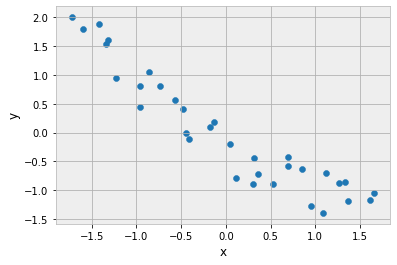

In [2]:
dummy_data = np.loadtxt('../data/dummy.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]

order = 2
x_1p = np.vstack([x_1**i for i in range(1, order+1)])  ## 按行相加，并且保持其二维特性array([[3], [7]]) #array([3, 7])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / \
    x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('B11197_05_01.png', dpi=300)

现在，我们将使用两个略有不同的模型（一个线性模型和一个2阶多项式）来拟合此数据，也称为抛物线或二次模型：

In [3]:
with pm.Model() as model_l:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=10)
    ϵ = pm.HalfNormal('ϵ', 5)

    μ = α + β * x_1s[0]

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_1s)

    trace_l = pm.sample(2000,cores=1)

with pm.Model() as model_p:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=10, shape=order)
    ϵ = pm.HalfNormal('ϵ', 5)

    μ = α + pm.math.dot(β, x_1s)

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_1s)

    trace_p = pm.sample(2000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, β, α]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:02<00:00, 900.07it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, β, α]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:08<00:00, 303.77it/s]


In [133]:
x_1s

array([[-1.72414181, -1.5947931 , -1.41718994, -1.32135125, -1.33810627,
        -1.23087417, -0.96480453, -0.95877273, -0.85556184, -0.73492573,
        -0.56871598, -0.41591024, -0.4795793 , -0.44137787, -0.17932943,
        -0.12839419,  0.04786857,  0.11890983,  0.31862961,  0.3072362 ,
         0.36085225,  0.5310832 ,  0.69863335,  0.69662275,  0.85344969,
         0.95263938,  1.12354053,  1.0907007 ,  1.26897406,  1.33800472,
         1.37151475,  1.61412737,  1.66104141],
       [-0.6811725 , -0.76003053, -0.84312138, -0.87585202, -0.87074204,
        -0.89896365, -0.92310164, -0.9228906 , -0.91407052, -0.89128571,
        -0.83786718, -0.76623575, -0.7987041 , -0.77967256, -0.61277348,
        -0.57296772, -0.41671773, -0.34562583, -0.12078093, -0.13459894,
        -0.06852717,  0.15885519,  0.40880321,  0.40565007,  0.66281204,
         0.83719337,  1.15897266,  1.09504594,  1.45405472,  1.6009563 ,
         1.67385522,  2.23259249,  2.34691077]])

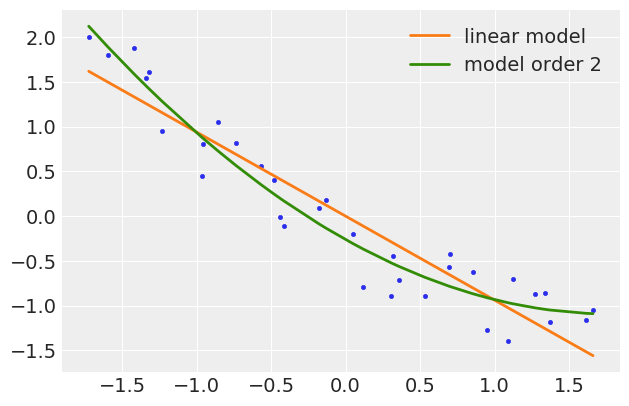

In [131]:
x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)

α_l_post = trace_l['α'].mean()
β_l_post = trace_l['β'].mean(axis=0)
y_l_post = α_l_post + β_l_post *  x_new

plt.plot(x_new, y_l_post, 'C1', label='linear model')

α_p_post = trace_p['α'].mean()
β_p_post = trace_p['β'].mean(axis=0)
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)

plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')

#α_p_post = trace_p['α'].mean()
#β_p_post = trace_p['β'].mean(axis=0)
#x_new_p = np.vstack([x_new**i for i in range(1, order+1)])
#y_p_post = α_p_post + np.dot(β_p_post, x_new_p) 

plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()
plt.savefig('B11197_05_02.png', dpi=300)

2阶模型似乎做得更好，但是线性模型并没有那么糟糕。 让我们使用PyMC3为两个模型获取后验预测样本：

In [25]:
y_l = pm.sample_posterior_predictive(trace_l, 2000,
                                     model=model_l)['y_pred']

y_p = pm.sample_posterior_predictive(trace_p, 2000,
                                     model=model_p)['y_pred']

C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 757.31it/s]
C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 764.23it/s]


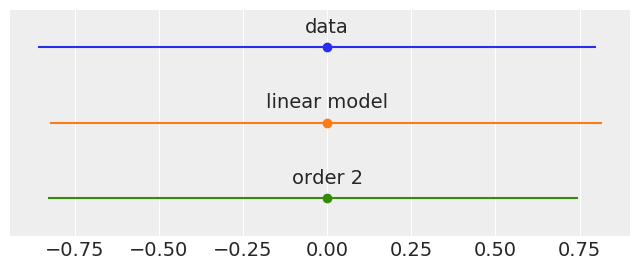

In [7]:
plt.figure(figsize=(8, 3))
data = [y_1s, y_l, y_p]
labels = ['data', 'linear model', 'order 2']
for i, d in enumerate(data):
    mean = d.mean()
    err = np.percentile(d, [25, 75])
    plt.errorbar(mean, -i, xerr=[[-err[0]], [err[1]]], fmt='o')
    plt.text(mean, -i+0.2, labels[i], ha='center', fontsize=14)  #x,y位置，些什么
plt.ylim([-i-0.5, 0.5])
plt.yticks([])
plt.savefig('B11197_05_03.png', dpi=300)

plt.errorbar()函数用于表现有一定置信区间的带误差数据。plt.errorbar(x, y, yerr=None,xerr=None, fmt='')

x,y: 数据点的位置坐标 ;xerr,yerr: 数据的误差范围;fmt: 数据点的标记样式以及相互之间连接线样式

上图显示了数据以及线性和二次模型的均值和四分位间距（IQR）。 在此图中，我们将平均每个模型的后验预测样本。 我们可以看到，两个模型的均值（平均）均得到很好的再现，并且分位数范围不是很远，但是在实际问题中存在一些小的差异，值得关注。 我们可以做许多不同的图来探索后验预测分布。 例如，我们可以绘制均值和四分位间距的散布，而不是它们的均值。 下图是此类绘图的示例：

In [34]:
np.subtract(*[1,2])

-1

## 补充知识
python函数传递参数的方式有两种：

位置参数（positional argument）
关键词参数（keyword argument）
*args 与 **kwargs 的区别，两者都是 python 中的可变参数：

*args 表示任何多个无名参数，它本质是一个 tuple
**kwargs 表示关键字参数，它本质上是一个 dict
如果同时使用 *args 和 **kwargs 时，必须 *args 参数列要在 **kwargs 之前。


In [36]:
def fun(*args, **kwargs):
    print('args=', args)
    print('kwargs=', kwargs)
fun(1, 2, 3, 4, A='a', B='b', C='c', D='d')

def fun(**kwargs):
     for key, value in kwargs.items():
            print("{0} 喜欢 {1}".format(key, value))
fun(Geek="cat", cat="box")

args= (1, 2, 3, 4)
kwargs= {'A': 'a', 'B': 'b', 'C': 'c', 'D': 'd'}
Geek 喜欢 cat
cat 喜欢 box


# 序列解包
可以使用序列解包功能对多个变量进行赋值。

In [48]:
a=[1,2,3]
b,c,d=a
print (a,b,c,d)
s={'a':1,'b':2,'c':3}
b,c,d=s.items()
print (s,b,c,d)
b,c,d=s
print (s,b,c,d)
b,c,d=s.values()
print (s,b,c,d)

key=['a','b','c']
values=[1,2,3]
for k,v in zip(key,values):
    print (k,v)
    
key=['a','b','c']
for i,v in enumerate(key):
    print (i,v)
    
s={'a':1,'b':2,'c':3}
for i,v in s.items():
    print (i,v)

[1, 2, 3] 1 2 3
{'a': 1, 'b': 2, 'c': 3} ('a', 1) ('b', 2) ('c', 3)
{'a': 1, 'b': 2, 'c': 3} a b c
{'a': 1, 'b': 2, 'c': 3} 1 2 3
a 1
b 2
c 3
0 a
1 b
2 c
a 1
b 2
c 3


In [40]:
a, *b, c = 0, 1, 2, 3
print(b)
print (*[1,2,3],4)
print (np.percentile(y_1s, [75, 25], axis=a),*np.percentile(y_1s, [75, 25], axis=a))

[1, 2]
1 2 3 4
[ 0.79986227 -0.85902444] 0.7998622656297811 -0.8590244371435516


In [69]:
np.mean(y_l,0).shape

(33,)

[-0.08824802 -0.11621714  0.11607829 ... -0.01834986  0.08007273
 -0.04600934]
[-0.06360259 -0.01845947 -0.0775073  ...  0.01850574  0.00158766
 -0.10527762]
[1.55704711 1.74835088 1.60063755 ... 2.05106299 1.45865366 1.49756622]
[1.55522182 1.26831877 1.47915678 ... 1.28035222 1.28096121 1.35479066]


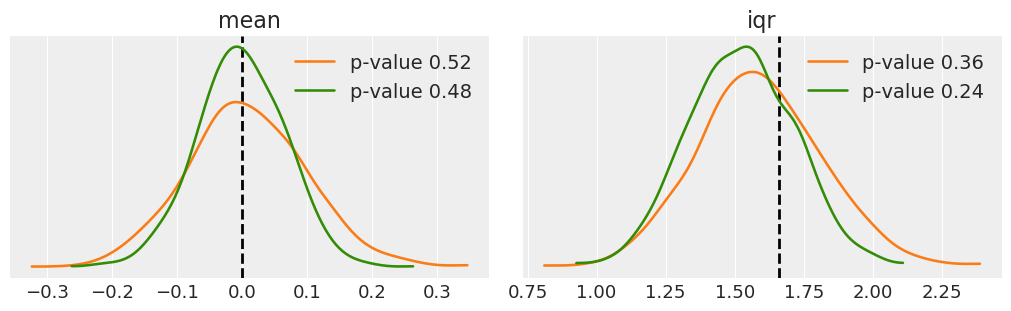

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)


def iqr(x, a=0):
    return np.subtract(*np.percentile(x, [75, 25], axis=a))


for idx, func in enumerate([np.mean, iqr]):  #虚线是真实的观察值
    T_obs = func(y_1s)
    ax[idx].axvline(T_obs, 0, 1, color='k', ls='--')
    for d_sim, c in zip([y_l, y_p], ['C1', 'C2']):
        print ( func(d_sim, 1))
        T_sim = func(d_sim, 1)   #代表axis=1
        p_value = np.mean(T_sim >= T_obs)
        az.plot_kde(T_sim, plot_kwargs={'color': c},
                    label=f'p-value {p_value:.2f}', ax=ax[idx])
    ax[idx].set_title(func.__name__)
    ax[idx].set_yticks([])
    ax[idx].legend()
plt.savefig('B11197_05_04.png', dpi=300)

在图5.4中，黑色虚线表示从数据（均值或IQR）计算出的统计量。 因为我们只有一个数据集，所以统计信息只有一个值（而不是分布）。 曲线（使用来自图5.3的相同颜色代码）表示从后验预测样本计算出的平均值（左图）或四分位间距（右图）的分布。 您可能还已经注意到，图5.4还包含标记为p值的值。 我们通过将模拟数据与实际数据进行比较来计算这些值。 对于这两个集合，我们都计算一个摘要统计量（在此示例中为均值或IQR），然后计算来自模拟的摘要统计量等于或大于从数据计算得出的摘要统计量的比例。 如果数据和模拟结果一致，则我们应该期望p值在0.5左右，否则我们将存在后验预测分布有偏差。(贝叶斯（Bayesian）的p值只是一种获取用于测量后验预测拟合度的数字的方法。)

如果您熟悉常客方法，并且正在阅读这本书，因为有人告诉您好人不再使用p值，那么您以前心爱的作者可能会感到震惊甚至失望。 但是要保持冷静并继续阅读。 这些贝叶斯值确实是p值，因为它们的定义基本上与它们的亲戚表亲相同：

![title](5_1.png)

也就是说，我们获得了获得模拟统计信息的可能性Tsim等于或大于数据Tobs中的统计量。 在这里，T几乎可以是提供数据摘要的任何内容。 在图5.4中，T是左侧面板的平均值，右侧面板的标准偏差。 首先应考虑促使推理的问题，然后选择T。

这些p值是贝叶斯（Bayesian），因为对于采样分布，我们使用后验预测分布。 还要注意，我们并没有以任何零假设为条件； 实际上，我们具有$ \ theta的整个后验分布，并且我们以观察到的数据为条件。 另一个不同之处在于，我们没有使用任何预定义的阈值来声明统计显着性，也没有进行假设检验-我们只是试图计算一个数字以评估后验预测分布对数据集的拟合度。

后验预测检查（使用图或贝叶斯p值之类的数字汇总或两者结合使用）是非常灵活的想法。 这个概念足够笼统，可以让分析师利用他们的想象力提出不同的方法来探索后验预测分布，并使用合适的方法让他们讲出数据驱动的故事，包括但不限于模型比较。 在以下各节中，我们将探索其他方法来比较模型。

# Occam's razor – simplicity and accuracy 

在替代品中进行选择时，有一种称为Occam剃刀的指导原则，其中大致指出以下内容：
#### 如果对同一现象有两个或更多等效解释，则应选择较简单的一种。
这种启发式方法有很多理由。 其中之一与波普尔提出的可证伪性标准有关。 另一个则采取务实的观点，并指出：与较复杂的模型相比，较简单的模型更易于理解，我们应该保留较简单的模型。 正如我们在讨论贝叶斯因素时所看到的那样，另一个理由是基于贝叶斯统计。 在不深入讨论这些理由的情况下，我们暂时将接受此标准作为有用的经验法则，听起来似乎是合理的。

比较模型时，我们通常应考虑的另一个因素是模型的准确性，即模型拟合数据的程度。 我们已经看到了一些准确性的度量，例如确定系数，可以将其解释为线性回归中已解释方差的比例，并且后验预测检查也基于数据准确性的思想。 如果我们有两个模型，并且其中一个模型比另一个模型更好地解释了数据，那么我们应该首选该模型，也就是说，我们希望模型具有更高的准确性，对吗？

凭直觉，似乎在比较模型时，我们倾向于喜欢那些精度较高的模型和那些简单的模型。 到目前为止，一切都很好，但是，如果较简单的模型具有最差的精度，我们该怎么办？ 而且，更笼统地说，我们如何平衡这两种贡献？

在本章的其余部分，我们将讨论在这两个贡献之间保持平衡的想法。 本章比前几章更具理论性（即使我们只是从头开始研究该话题）。 但是，我们将使用代码，图形和示例，这些代码，图形和示例将帮助我们从平衡准确性与复杂性之间的这种（正确的）直觉转变为更具理论性（或至少基于经验）的理由。

我们将从将越来越复杂的多项式拟合到一个非常简单的数据集开始。 代替使用贝叶斯机制，我们将使用最小二乘近似拟合线性模型。 请记住，后者可以从贝叶斯角度解释为先验条件平坦的模型。 因此，从某种意义上讲，我们仍然是贝叶斯主义者，只是我们采取了一些捷径：

 
7.533
 
0.5795 x + 2.704
          2
-0.06751 x + 1.788 x - 1.764
          5          4        3         2
0.004155 x - 0.1848 x + 3.14 x - 25.39 x + 98.26 x - 140.5


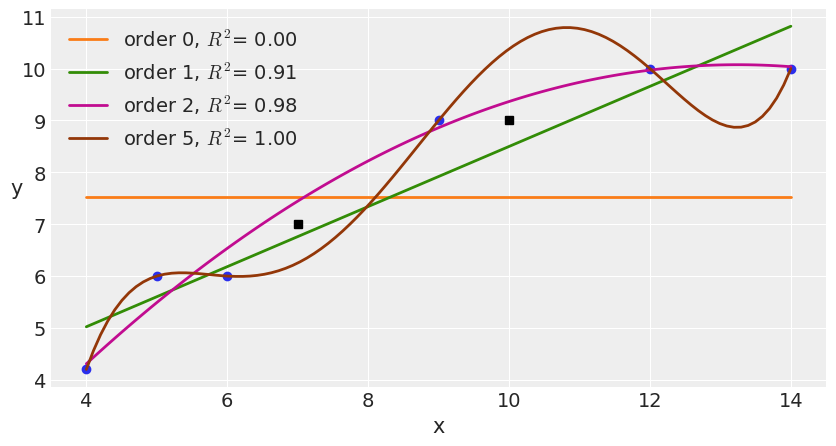

In [71]:
x = np.array([4., 5., 6., 9., 12, 14.])
y = np.array([4.2, 6., 6., 9., 10, 10.])

plt.figure(figsize=(10, 5))
order = [0, 1, 2, 5]
plt.plot(x, y, 'o')
for i in order:
    x_n = np.linspace(x.min(), x.max(), 100)
    coeffs = np.polyfit(x, y, deg=i)  #多项式拟合 z= numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    ffit = np.polyval(coeffs, x_n)  #Deg  Degree of the fitting polynomial 1次多项式即为线性，deg次数太高会有震荡,采用最小二乘多项式拟合，返回多项式的系数
 
    p = np.poly1d(coeffs)  #可以获得多项式（一元多次函数）
    print (p)
    yhat = p(x)
    ybar = np.mean(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    r2 = ssreg / sstot

    plt.plot(x_n, ffit, label=f'order {i}, $R^2$= {r2:.2f}')

plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.savefig('B11197_05_05.png', dpi=300)
plt.plot([10, 7], [9, 7], 'ks')
plt.savefig('B11197_05_06.png', dpi=300)

### Too many parameters leads to overfitting
从图5.5中可以看出，模型复杂度的增加伴随着确定系数的提高而带来的准确性的提高；实际上，我们可以看到5阶多项式非常适合数据！您可能还记得我们在第3章“使用线性回归建模”中简要讨论了多项式的这种行为，并且我们还讨论了一般而言，对于实际问题使用多项式并不是一个好主意。

为什么5阶多项式能够捕获数据而不会丢失单个数据点？这样做的原因是我们拥有与数据点数量相同的参数数量6，也就是6，因此，该模型只是以不同的方式对数据进行编码。该模型并不是从数据中真正学到东西，而只是在记住东西！从这个例子中，我们可以看到，精度更高的模型并不总是我们真正想要的。

想象一下，我们获得了更多的金钱或时间，因此我们收集了更多的数据点以包含在先前的数据集中。例如，我们收集点[（10，9），（7,7）]（见图5.6）。与1阶或2阶模型相比，5阶模型对这些要点的解释有多好？不太好吧？ 5阶模型在数据中没有学习到任何有趣的模式。取而代之的是，它只是记住了一些东西（很抱歉坚持这个想法），因此5阶模型在概括未来的，未观察到但可能会观察到的数据方面做得很不好：

当模型与最初用于学习其参数的数据集非常吻合，但在拟合其他数据集时却表现不佳时，我们说我们已经过拟合。这是统计和机器学习中的一个非常普遍的问题。描述过度拟合问题的一种非常有用的方法是，认为数据集具有两个成分：信号和噪声。信号就是我们想要从数据中学到的东西。如果我们使用数据集，那是因为我们认为其中存在信号，否则将徒劳无功。另一方面，噪声没有用，它是测量错误，数据生成或捕获方式的限制，数据损坏等的产物。当模型过于灵活以至于它可以学习噪声时，它就会过拟合，从而有效地隐藏了信号。这是Occam剃刀的实际证明。至少从原则上讲，我们总是可以创建一个如此复杂的模型，以至于它可以详细解释一切，就像博尔赫斯所描述的那样，在帝国中，制图师达到了如此成熟的水平，以至于他们创建了一个帝国地图，其尺寸为帝国，与之重合。

### Too few parameters leads to underfitting
继续执行相同的示例，但在另一个极端的复杂性上，我们得到了0阶模型。该模型只是伪装成线性模型的变量的高斯模型。 从图5.5中注意到，该模型仅捕获因变量的平均值，并且完全独立于变量的值。 我们说这个模型不适合。

### The balance between simplicity and accuracy 简单性与准确性之间的平衡
"事情应该力求简单,不过不能过于简单"引用自爱因斯坦的话，就像Occam的剃刀一样。 理想情况下，我们希望有一个既不会拟合数据又不会拟合数据的模型。 因此，总的来说，我们将面临一个折衷，并且必须以某种方式优化或调整模型。

通常根据方差和偏差来讨论这种折衷：
高偏差是由于模型无法容纳数据而导致的。 高偏差可能导致模型错过相关模式，从而导致拟合不足。
高方差是模型对数据中的细节具有高度敏感性的结果。 高方差可能导致模型捕获数据中的噪声，从而导致过度拟合。

在图5.5中，阶数为0的模型具有较高的偏差（和较低的方差），因为它被偏置为在变量的平均值处返回一条平坦线，而与的值无关。 5阶模型是方差较高（偏差较小）的模型。 看到这一点的更简单方法是对六个点的不同数据集进行成像。 您可以以非常不同的方式安排这六个点，并且此模型将适应此安排中的每一个。 它最适合其中的大多数（除了某些安排，例如圈子）。 有关更多详细信息，请参见练习6。

具有高偏见的模型是具有更多偏见（如果您可以原谅拟人化）或具有更多惯性（如果您可以原谅其物化）的模型，而具有高方差的模型则是一种更为开放的模型。 过于偏颇的问题是您没有足够的能力来容纳新证据。 心胸开阔的问题是，您最终会相信像terraplaner或anti-Vaxxers这样荒谬的东西。 通常，当我们增加其中一项时，我们减少了另一项，导致我们进行偏差方差的权衡。 再次，主要思想是我们想要一个平衡的模型。

### Predictive accuracy measures
在前面的示例中，或多或少容易看到0阶模型非常简单，而5阶模型对于数据而言过于复杂，但是其他两个呢？ 为了回答这个问题，我们需要一种更原则性的方法，一方面要考虑到准确性，另一方面要考虑到其简便性。 为此，我们将需要引入几个新概念。 前两个是：

样本内精度：使用用于拟合模型的数据测得的精度

样本外准确性：根据未用于拟合模型的数据测得的模型准确性，也称为预测准确性

对于数据和模型的任何组合，平均而言，样本内准确性将小于样本外准确性。 因此，使用样本内的准确性可能使我们误以为我们拥有比真实模型更好的模型。 因此，与样本内度量相比，首选样本外度量。 但是，通常存在问题。 我们需要能够留出一部分数据，而不是适合模型，而是对其进行测试。 对于大多数分析师而言，这通常是一种奢侈。 为了解决这个问题，人们花费了很多精力来设计仅使用样本内数据来估计样本外预测准确性的方法。 两种这样的方法是：

交叉验证：这是一种经验策略，它基于将可用数据分为子集的子集，这些子集用于交替拟合和评估

信息标准：这是几个相对简单的表达式的概括性术语，可以被视为近似通过执行交叉验证可能获得的结果的方式

### Cross-validation
在大多数情况下，交叉验证是一种简单有效的解决方案，可以在不保留数据的情况下评估模型。 下图概述了此过程。 我们获取数据，并将其划分为多个部分。 我们尝试使各部分或多或少相等（大小，有时也包括其他特征，例如相等数量的类）。 然后，我们用它们来训练模型，其余的训练模型。 然后，我们通过在训练集中保留一个不同的部分并将该部分用作测试集来系统地重复此过程，直到完成轮次为止。 然后将结果沿运行平均。 这称为K折交叉验证。 当等于数据点数时，我们得到了所谓的留一法交叉验证（LOOCV）。 有时，在进行LOOCV运算时，如果我们的循环数过高，则回合数可以小于数据点的总数：

![title](5_2.png)

交叉验证是机器学习者从业的基础。 我们在这里忽略了一些细节，但这对于当前的讨论是可以的。 有关更多详细信息，您可以阅读Sebastian Raschka撰写的《 Python Machine Learning》一书，或Jake Vanderplas撰写的《 Python Data Science Handbook》。 交叉验证是一个非常简单且有用的想法，但是对于某些模型或大量数据，交叉验证的计算成本可能超出了我们的可能性。 许多人试图提出更简单的计算量，以近似于通过交叉验证获得的结果，并在交叉验证执行起来不那么简单的情况下工作。 这是下一部分的主题。

### Information criteria
信息标准是各种不同的工具的集合，这些工具用于比较模型拟合数据的方式，同时考虑到惩罚性术语的复杂性。 换句话说，信息标准使我们在本章开始时开发的直觉形式化。 我们需要一种适当的方法来平衡模型一方面解释数据的能力，另一方面平衡模型的复杂性。

得出这些数量的确切方法与信息理论这个领域有关，这超出了本书的范围，因此我们将限制自己从实际的角度来理解它们。

### Log-likelihood and deviance 对数似然和偏差
衡量模型对数据拟合程度的一种直观方法是计算数据与模型做出的预测之间的二次平均误差：

![title](5_3.png)

请注意，这实质上是观察到的数据与预测数据之差的平均值。 对误差进行平方可确保差异不会抵消，并且相对于其他类似量计算方式（例如，使用绝对值），强调大误差。 更一般的方法是计算对数似然：

![title](5_4.png)

当似然性正常时，这与二次平均误差成正比。
在实践中，由于历史原因，人们通常不直接使用对数似然。 相反，他们使用一个称为偏差的量：

![title](5_5.png)

贝叶斯和非贝叶斯都使用偏差。 区别在于，在贝叶斯框架下，是从后验估计的，并且像从后验得到的任何数量一样，它具有分布。 相反，在非贝叶斯设置中，是点估计。 要学习如何使用这种偏差，我们应注意此数量的两个关键方面：

偏差越小，对数似然率越高，模型预测与数据的一致性越高。 因此，我们需要低偏差值。

偏差正在测量模型的样本内准确性，因此，复杂模型通常比简单模型具有更低的偏差。 因此，我们需要以某种方式包括复杂模型的惩罚项。在以下各节中，我们将学习不同的信息标准。 他们有一个事实，他们使用偏差和惩罚条款。 使它们与众不同的是如何计算偏差和惩罚项。

### Akaike information criterion
在这里，$P_{AIC}$只是参数的数量，$ \hat \theta_{mle} $是$ \theta $的最大似然估计。 最大似然估计是非贝叶斯算法的一种常见做法，通常，当使用平坦先验时，它等效于贝叶斯最大后验（MAP）估计。 注意$ \hat \theta_{mle} $是一个点估计，而不是分布。

![title](5_6.png)

再次，-2是出于历史原因。 从实践的角度来看，重要的观察结果是，第一项考虑了模型拟合数据的程度，第二项则对复杂模型进行了惩罚。 因此，如果两个模型能够很好地解释数据，但是一个模型比另一个模型具有更多的参数，则表明我们应该选择参数较少的模型。

AIC对于非贝叶斯方法非常有效，但是在其他方面则存在问题。 原因之一是它不使用后验，因此它丢弃了估计中有关不确定性的信息。 它也假设平坦先验，因此该方法与信息性先验和弱信息先验不兼容，就像本书中所使用的那样。

### Widely applicable Information Criterion
这是AIC的完全贝叶斯版本。 与AIC一样，广泛适用的信息标准（WAIC）有两个术语：一个用于衡量数据对模型的拟合程度，另一个是对复杂模型的惩罚：

![title](5_7.png)

如果您想更好地理解这两个术语，请仔细阅读WAIC部分。 从实际的角度来看，您只需要知道我们更喜欢较低的。

### Pareto smoothed importance sampling leave-one-out cross-validation 帕累托平滑重要性抽样留一法交叉验证
帕累托平滑重要性抽样留一法交叉验证（LOO-CV）是一种用于近似LOO-CV结果的方法，但实际上并未执行K次迭代。这不是一个信息标准，但实际上提供的结果与WAIC非常相似，并且在某些一般条件下，WAIC和LOO都渐近收敛。无需赘述，主要思想是可以通过适当地对似然度进行加权来近似LOO-CV。可以使用统计中一种非常重要且有用的技术（称为重要性抽样）来完成此操作。问题是结果不稳定。为了解决此不稳定问题，引入了一种新方法。此方法使用称为Pareto平滑重要性抽样（PSIS）的技术，该技术可用于计算更可靠的LOO估计值。解释类似于AIC和WAIC；值越低，模型的预测预测准确性越高。因此，我们更喜欢具有较低值的模型。

### Other Information Criteria
另一种常见的信息标准是偏差信息标准（DIC）。 如果我们使用bayes-o-meter™，那么它在AIC和WAIC之间处于中间位置。 尽管仍然流行，但WAIC在理论上和经验上都比DIC有用，因此建议使用WAIC而不是DIC。

另一个信息标准是贝叶斯信息准则（BIC），它类似于逻辑回归和我妈妈的干汤。 这个名字可能会引起误解。 提出使用BIC作为纠正AIC某些问题的一种方法，并且作者提出了贝叶斯的理由。 但是BIC并不是真正的贝叶斯，实际上与AIC非常相似。 它还假设先验是平坦的，并使用最大似然估计。 更重要的是，BIC与AIC和WAIC不同，并且与贝叶斯因子的概念更相关，我们将在本章稍后讨论。

## Computing information criteria with PyMC3

In [72]:
waic_l = az.waic(trace_l)
waic_l

Computed from 4000 by 33 log-likelihood matrix

        Estimate       SE
IC_waic    28.77     5.39
p_waic      2.47        -

In [74]:
 az.waic(trace_p)

Computed from 4000 by 33 log-likelihood matrix

        Estimate       SE
IC_waic     9.20     4.62
p_waic      2.65        -

In [75]:
 az.loo(trace_p)

Computed from 4000 by 33 log-likelihood matrix

       Estimate       SE
IC_loo     9.26     4.63
p_loo      2.68        -

如果要计算LOO而不是WAIC，则必须使用z.loo。
对于WAIC和LOO，PyMC3报告四个值：
1、点估计
2、点估计的标准误差（这是通过假设正态性来计算的，因此，当样本量较小时，它可能不是很可靠）
3、有效参数数
4、警告（有关详细信息，请阅读WAIC和LOO计算可靠性的A注释）

由于始终以相对方式解释WAIC / LOO的值，也就是说，通过在模型之间进行比较，ArviZ提供了两个辅助功能以简化比较。

In [4]:
cmp_df = az.compare({'model_l':trace_l, 'model_p':trace_p},
                    method='BB-pseudo-BMA')  #Bayesian bootstrapping (pseudo-Bayesian Modeling Averaging)
cmp_df

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_p,0,-4.59128,2.67161,0,0.998088,2.60361,0,False,log
model_l,1,-14.4825,2.54911,9.89119,0.00191239,2.29508,2.69657,False,log


我们有很多列，所以让我们一一检查一下它们的含义：
1.第一列清楚地包含WAIC的值。 DataFrame始终按从最低到最高的WAIC排序。 索引反映了将模型传递给该函数的顺序。
2.第二列是估计的有效参数数量。 通常，具有更多参数的模型将更灵活地拟合数据，同时也可能导致过度拟合。 因此，我们可以将pWAIC解释为惩罚项。 直观地，我们还可以将其解释为衡量每个模型拟合数据的灵活性的一种度量。
3.第三列是排名最高的模型的WAIC值与每个模型的WAIC值之间的相对差。 因此，第一个模型的值始终为0。
4.有时，在比较模型时，我们不想选择最佳模型。 相反，我们希望通过对所有模型（或至少几个模型）求平均来执行预测。 理想情况下，我们希望执行加权平均，从而为似乎可以更好地解释/预测数据的模型赋予更多权重。 有许多方法可以执行此任务。 其中之一是根据每个模型的WAIC值使用Akaike权重。 给定数据，这些权重可以粗略地解释为每个模型（在比较模型中）的概率。 这种方法的一个警告是，权重基于WAIC的点估计（即，不确定性被忽略）。
5.第五列记录了WAIC计算的标准误差。 标准误差可用于评估WAIC估计的不确定性。
6.以与可以为每个WAIC值计算标准误差相同的方式，我们可以计算两个WAIC值之差的标准误差。 请注意，两个数量不一定相同。 原因是模型之间的WAIC不确定性相关。 对于排名最高的模型，此数量始终为0。
7.最后，我们有最后一列，名为警告。 值为1表示WAIC的计算可能不可靠。 请阅读有关WAIC和LOO计算的可靠性的A注释，以获取更多详细信息。

通过使用az，我们还可以获得与可视化类似的信息。 plot_compare函数。 第二个便利函数获取（az。compare）的输出，并生成一种摘要图，其形式与Richard McElreath在《 Statistical Rethinking》一书中使用的样式类似：

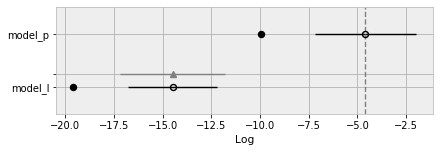

In [5]:
az.plot_compare(cmp_df)
plt.savefig('B11197_05_08.png', dpi=300)

让我详细描述图5.8：
1、空圆圈代表WAIC的值，与之相关的黑色误差线是WAIC的标准偏差的值。
2、最低的WAIC值也用垂直的灰色虚线表示，以便于与其他WAIC值进行比较。
3、填充的黑点是每个模型的样本内偏差，对于WAIC而言，与相应的WAIC值相比，偏差为2 pWAIC。
4、对于除排名靠前的模型以外的所有模型，我们还得到一个三角形，指示该模型与顶级模型之间的WAIC差值，以及一个灰色的误差线，指示排名靠前的WAIC之间差值的标准误差 和每种型号的WAIC。

使用信息标准的更简单方法是执行模型选择。 只需选择信息准则值较低的模型，而忽略任何其他模型。 如果遵循这种解释，这是一个非常简单的选择-二次模型是最好的。 请注意，标准错误不会重叠，这使我们有信心进行此选择。 相反，如果标准错误重叠，我们应该提供更细微的回答。

### A note on the reliability of WAIC and LOO computations 关于WAIC和LOO计算的可靠性的说明
在计算WAIC或LOO时，您可能会收到一条警告消息，表明这两种计算的结果都不可靠。 根据经验确定的临界值会发出此警告（请参阅“继续阅读”部分以获取参考）。 虽然不一定有问题，但可能表明这些度量的计算存在问题。 WAIC和LOO是相对较新的成员，我们可能仍需要开发更好的方法来提高其可靠性。 无论如何，如果您遇到这种情况，首先，请确保您有足够的样本，并有充分混合的可靠样本（请参见第8章，推理引擎）。 如果仍然收到这些消息，则LOO方法的作者建议使用更健壮的模型，例如使用学生的t分布而不是高斯模型。 如果这些建议都不起作用，那么您可能需要考虑使用另一种方法，例如直接执行K折交叉验证。

笼统地说，WAIC和LOO只能帮助您在给定的一组模型中进行选择，但是它们不能帮助您确定模型是否真的可以很好地解决我们的特定问题。 因此，WAIC和LOO应该辅以后验预测检查，以及其他信息和测试，以帮助我们根据与我们要解决的特定问题相关的领域知识来放置模型和数据。

## Model Averaging
模型选择因其简单性而吸引人，但我们正在舍弃有关模型不确定性的信息。 这在某种程度上类似于计算整个后验，然后仅保留后验的均值。 我们可能对我们真正了解的东西过于自信。 一种选择是执行模型选择，但报告和讨论不同的模型，以及计算出的信息标准值，它们的标准误差值以及后验预测检查。 重要的是，将所有这些数字和测试置于我们所面临的问题中，以便我们和我们的听众更好地了解模型的可能局限性和不足之处。 如果您在学术界，则可以使用这种方法在论文的讨论部分，演示文稿，论文等中添加元素。

另一种方法是在模型比较中完全包含不确定性并执行模型平均。 现在的想法是使用每个模型的加权平均值生成一个元模型（和元预测）。 计算这些权重的一种方法是应用以下公式：

![title](5_8.png)

此处，dEi是i-esim模型的WAIC值与WAIC最低的模型之间的差。除了WAIC，您可以使用任何其他所需的信息标准，例如AIC或其他措施，例如LOO。此公式是一种从WAIC值（或其他类似度量）计算每个模型（给定的一组模型）的相对概率的启发式方法。查看分母如何仅是一个归一化项，以确保权重之和为1。您可能还记得第4章，线性化模型中的该表达式，因为它只是softmax函数。使用前面公式中的权重来计算平均模型称为伪贝叶斯模型平均。真正的贝叶斯建模平均将是使用边际可能性而不是WAIC或LOO。但是，即使使用边际可能性在理论上听起来很有吸引力，在模型比较和模型平均方面，也有理论和经验上的原因都倾向于选择WAIC或LOO而不是边际可能性。您将在“贝叶斯因素”部分中找到有关此内容的更多详细信息。

使用PyMC3，您可以通过将method ='pseudo-BMA'（伪贝叶斯模型平均）参数传递给az来计算在上一个公式中表示的权重。 比较功能。 该公式的警告之一是，它在计算Ei值时未考虑不确定性。 假设高斯近似，我们可以计算每个Ei的标准误差。 这些是函数（az.waic），（az.loo）和az函数返回的错误。 当传递method ='pseudo-BMA'参数时进行比较。 我们还可以使用贝叶斯自举估计不确定性。 与假设正常性相比，这是一种更可靠的方法。 如果将method ='BB-pseudo-BMA'传递给az，PyMC3可以为您计算。 比较功能。

为平均模型计算权重的另一种方法称为预测分布的堆叠或仅堆叠。 这是在PyMC3中通过将method ='stacking'传递给az来实现的。 相比 。 基本思想是通过最小化元模型和真实生成模型之间的差异，将几个模型组合到一个元模型中。 使用对数评分规则时，这等效于以下内容：

![title](5_9.png)

在此，n是数据点数，k是模型数。 为了实施解决方案，我们将w约束为Wk> = 0且sumWk = 1。 数量p（yi | y-i，Mk）是Mk模型的遗忘预测分布。 正如我们已经讨论的那样，计算它需要对每个模型进行n次拟合，每次都遗漏一个数据点。 幸运的是，我们可以使用WAIC或LOO来近似精确的留一法则预测分布，这就是PyMC3所做的。

平均模型还有其他方法，例如，显式构建包含所有感兴趣的模型作为子模型的元模型。 我们可以以对每个子模型的参数进行推断的方式构建模型，同时计算每个模型的相对概率（有关示例，请参阅贝叶斯因子部分）。

除了平均离散模型外，我们有时还可以想到它们的连续版本。 一个玩具的例子是，假设我们有一个掷硬币的问题，并且我们有两个不同的模型：一个模型先偏于头部，另一个偏向尾。 这是一个连续的版本，它将是一个层次模型，其中先验分布是直接从数据中估算的。 该分层模型包括离散模型作为特殊情况。

哪种方法更好？ 这取决于我们的具体问题。 我们真的有充分的理由考虑离散模型，还是将我们的问题更好地表示为连续模型？ 因为我们正在根据相互竞争的解释进行思考，所以选择一个模型对我们的问题是否重要？或者因为我们对预测更感兴趣，所以将平均作为更好的主意还是可以将过程生成过程真正视为一个平均值？ 子流程？ 所有这些问题都无法通过统计来回答，只能在领域知识的上下文中通过统计来告知。

以下只是一个如何从PyMC3获取加权后验预测样本的虚拟示例。 在这里，我们使用（pm。sample_posterior_predictive_w）函数（注意，函数名末尾的w）。 （pm。sample_posterior_predictive）和（pm。sample_posterior_predictive_w）之间的区别在于，后者接受多个跟踪和模型以及权重列表（默认情况下，所有模型的权重均相同）。 您可以从az获得这些权重。 比较或您想要的任何其他来源：

In [77]:
w = 0.5
y_lp = pm.sample_posterior_predictive_w([trace_l, trace_p],
                                        samples=1000,
                                        models=[model_l, model_p],
                                        weights=[w, 1-w])

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 535.70it/s]


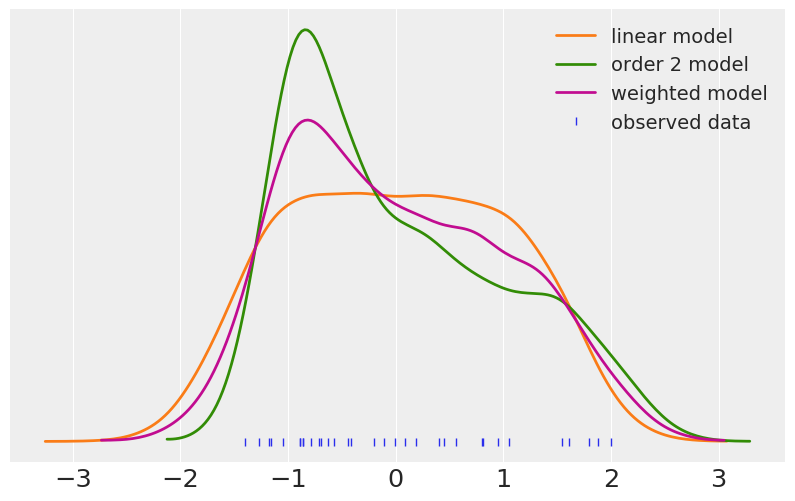

In [14]:
_, ax = plt.subplots(figsize=(10, 6))
az.plot_kde(y_l, plot_kwargs={'color': 'C1'}, label='linear model', ax=ax)
az.plot_kde(y_p, plot_kwargs={'color': 'C2'}, label='order 2 model', ax=ax)
az.plot_kde(y_lp['y_pred'], plot_kwargs={'color': 'C3'},
           label='weighted model', ax=ax)

plt.plot(y_1s, np.zeros_like(y_1s), '|', label='observed data')
plt.yticks([])
plt.legend()
plt.savefig('B11197_05_09.png', dpi=300)

我说这是一个虚拟示例，因为与线性模型相比，二次模型的WAIC值低得多，因此第一个模型的权重基本上为1，第二个模型的权重为0，并生成图5.9，我假设这两个模型 具有相同的重量。

# Bayes factors
贝叶斯因素是评估和比较贝叶斯世界（至少在某些国家中）的模型的常见替代方法。 要了解贝叶斯因素是什么，让我们再写一次贝叶斯定理（我们已经有一段时间没有这样做了！）：

![title](5_10.png)

分母中的术语称为边际可能性（或证据），您可能在第一章中就已经记得。 在进行推论时，我们不需要计算该归一化常数，因此在实践中，我们经常计算直到一个常数因子的后验。 但是，对于模型比较和模型平均而言，边际可能性是重要的数量。 如果我们的主要目标是从一组模型中仅选择一个模型，则最好的模型，则可以选择p（y | Mk）最大的模型。 通常，p（y | Mk）是很小的数字，它们自己不能告诉我们太多； 就像信息准则一样，重要的是相对价值。 因此，在实践中，人们经常计算两个边际可能性的比率，这称为贝叶斯因子：

![title](5_11.png)

一些作者提出了一些表格，这些表格的范围可以离散化和简化BF的解释。 例如，以下项目符号列表显示了证据的强度，相对于模型1偏爱模型0：1-3：轶事
3-10：中度
10-30：强壮
30-100：非常强壮
$> 100：极限$

请记住，这些规则只是惯例，充其量只是简单的指南。 但是，结果应始终置于上下文中，并应附有足够的细节，以使其他人可以检查他们是否同意我们的结论。 提出索赔所必需的证据在粒子物理学，法院或在撤离城镇以防止数百人死亡的计划中都不相同。

![title](5_12.png)

### 一些评论
现在，我们将简要讨论有关边际可能性的一些关键事实。 通过仔细检查边际可能性的定义，我们可以了解它们的属性和对其实际使用的后果：

![title](5_13.png)

优点：参数较多的模型比参数较少的模型有更大的惩罚。 贝叶斯因子具有内置的Occam剃刀！ 直观的原因是，参数数量越多，关于可能性的先验分布就越大。 因此，在上一个公式中计算积分时，您会得到一个较小的值，并且先验会更集中。
坏处：计算边际可能性通常是一项艰巨的任务，因为前面的公式是在高维参数空间上高可变函数的积分。 通常，需要使用或多或少的复杂方法在数值上求解该积分。
丑陋：边际可能性敏感地取决于先验值。

使用边际可能性比较模型是一个好主意，因为已经包含了对复杂模型的惩罚（因此可以防止我们过度拟合）。 同时，先验的变化将影响边际可能性的计算。 乍一看，这听起来有些愚蠢-我们已经知道先验会影响计算（否则，我们可以简单地避免使用它们），但是这里的意思是敏感这个词。 我们正在谈论先验的变化，这些变化将使θ的推论或多或少保持相同，但可能对边际可能性的值产生很大影响。 您可能已经在前面的示例中注意到，通常，具有标准偏差为100的正态先验与具有标准偏差为1,000的正态先验相同。 相反，贝叶斯因素将受到此类变化的影响。

关于贝叶斯因子的另一种批评来源是它们可以用作进行假设检验的贝叶斯方法。 这样做本身没有错，但是许多作者指出，与本书和其他书籍（如Richard McElreath的《统计再思考》（Statistics Rethinking）所使用的推理方法）相似，推理方法比假设检验方法更适合大多数问题（ 是否为贝叶斯）。
说完这些，让我们看一下如何计算贝叶斯因子。

# Computing Bayes factors
贝叶斯因子的计算可以框架化为层次模型，其中高级参数是分配给每个模型并从分类分布中采样的索引。 换句话说，我们同时执行两个（或多个）竞争模型的推断，并使用在模型之间跳转的离散变量。 每个模型的采样时间与多少成正比。 然后，我们应用公式5.10来获得贝叶斯因子。还是拿掷硬币的例子：

![title](5_14.png)

Notice that while we are computing Bayes factors between models that differ only on the prior, the models could differ on the likelihood, or even both. This idea is the same.

In [2]:
coins = 30 # 300
heads = 9 # 90
y_d = np.repeat([0, 1], [coins-heads, heads])  #numpy.repeat(a,repeats,axis=None); 

In [3]:
coins-heads

21

现在，让我们看一下PyMC3模型。 要在先验之间切换，我们是
使用$ pm.math.switch $功能。 如果此函数的第一个参数求值为true，则返回第二个参数，否则返回第三个参数。 请注意，我们也使用$ pm.math.eq $函数检查model_index变量是否等于0：

Sequential sampling (2 chains in 1 job)
CompoundStep
>BinaryGibbsMetropolis: [model_index]
>NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|███████████████████████████████████████████| 5500/5500 [00:05<00:00, 1034.92it/s]
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotl

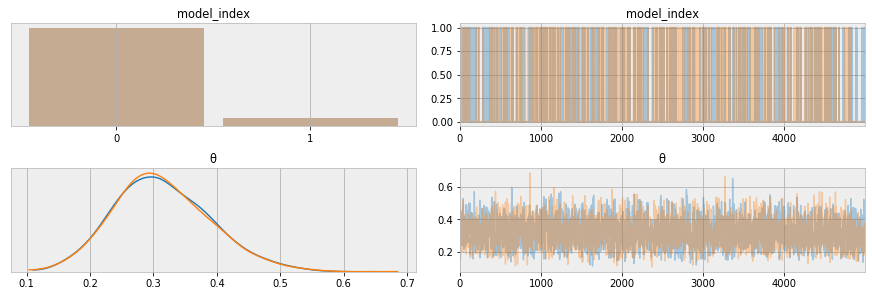

In [4]:
with pm.Model() as model_BF:
    p = np.array([0.5, 0.5])
    model_index = pm.Categorical('model_index', p=p)

    m_0 = (4, 8)
    m_1 = (8, 4)
    m = pm.math.switch(pm.math.eq(model_index, 0), m_0, m_1)

    # a priori
    θ = pm.Beta('θ', m[0], m[1])
    # likelihood
    y = pm.Bernoulli('y', θ, observed=y_d)

    trace_BF = pm.sample(5000,cores=1)
az.plot_trace(trace_BF)
plt.savefig('B11197_05_11.png', dpi=300)

In [5]:
pM1 = trace_BF['model_index'].mean()
pM0 = 1 - pM1
BF = (pM0 / pM1) * (p[1] / p[0])
BF

11.484394506866415

In [6]:
p

array([0.5, 0.5])

结果，我们得到≈11的值，这意味着模型0比模型1偏爱一个数量级。 这是完全有道理的，因为数据的head值比$ \theta = 0.5 $的期望值少，并且两个模型之间的唯一区别是模型0的先验与$ \theta <0.5 $的兼容性更高（tails多于heads） ），而模型1与$ \theta> 0.5 $兼容（正面多于尾部）。

### Common problems when computing Bayes factors
计算贝叶斯方法时，一些常见的问题会影响我们的工作方式，例如，按照定义，如果一个模型优于另一个模型，那么从该模型进行采样的时间将比从另一个模型花费的时间更多。 这可能会有问题，因为我们可以对其中一个模型进行欠采样。 另一个问题是，即使不使用参数来拟合该模型，参数的值也会更新。 也就是说，当选择模型0时，将更新模型1中的参数，但是由于它们不用于解释数据，因此只能获取
受之前的限制。 如果先验模糊不清，则有可能当我们选择模型1时，参数值与先前接受的值相距太远，因此该步骤被拒绝。 因此，我们最终遇到了采样问题。

万一遇到这些问题，我们可以对模型进行两次修改以改善采样：

理想情况下，如果两个模型均等地访问，我们可以得到更好的抽样，因此我们可以调整每个模型的先验值（先前模型中的p变量），以偏向不利的模型并偏向最不利的模型 模型。 这不会影响贝叶斯因子的计算，因为我们将先验包括在内。

根据Kruschke等人的建议，使用伪先验。 这个想法很简单：如果问题在于参数不受限制地漂移，那么当没有选择它们所属的模型时，一种解决方案是尝试人为地限制它们，但仅限于不使用时！ 您可以在https://github.com上找到Kruschke在他的书中使用的模型中使用伪先验的示例 https://github.com/aloctavodia/Doing_bayesian_data_analysis .

### 使用顺序蒙特卡洛计算贝叶斯因子
计算贝叶斯因子的另一种方法是使用称为顺序蒙特卡洛（SMC）的采样方法。 我们将在第8章“推理引擎”中学习此方法的详细信息。 现在，我们只需要知道该采样器将边际可能性的估计值作为副产品即可计算出来，可以直接用于计算贝叶斯因子。 要在PyMC3中使用SMC，我们只需要将（pm。SMC（））传递给sample的step参数：
https://github.com/pymc-devs/pymc3/blob/046744a91771aa09e1b662a054e1b5acf78e7e14/docs/source/notebooks/Bayes_factor.ipynb

In [7]:
with pm.Model() as model_BF_0:
    θ = pm.Beta('θ', 4, 8)
    y = pm.Bernoulli('y', θ, observed=y_d)
    trace_BF_0 = pm.sample_smc(2500,cores=1)

with pm.Model() as model_BF_1:
    θ = pm.Beta('θ', 8, 4)
    y = pm.Bernoulli('y', θ, observed=y_d)
    trace_BF_1 = pm.sample_smc(2500,cores=1)

Sample initial stage: ...
Stage:   0 Beta: 1.000 Steps:  25 Acce: 1.000
Sample initial stage: ...
Stage:   0 Beta: 0.208 Steps:  25 Acce: 1.000
Stage:   1 Beta: 0.694 Steps:  25 Acce: 0.709
Stage:   2 Beta: 1.000 Steps:   3 Acce: 0.563


根据SMC方法，贝叶斯因子也大约为11。如果要使用PyMC3计算贝叶斯因子，我强烈建议使用SMC方法。 本书介绍的另一种方法在计算上比较麻烦，并且需要进行更多的手动调整，主要是因为模型之间的跳转需要用户通过反复试验进行更多的调整。 另一方面，SMC是一种更自动化的方法。

In [8]:
model_BF_0.marginal_likelihood / model_BF_1.marginal_likelihood

11.320302316685561

In [9]:
BF_smc = np.exp(model_BF_0.marginal_likelihood - model_BF_1.marginal_likelihood)
print(round(BF_smc))   #据说新的版本是.marginal_log_likelihood 而不是.marginal_likelihood

1.0


## Bayes factors and information criteria
注意，如果采用贝叶斯因子的对数，则可以将边际似然比转换为差。 比较边际可能性的差异类似于比较信息标准的差异。 此外，我们可以将贝叶斯因素或更确切地说是边际可能性解释为具有拟合项和惩罚项。 表示模型对数据的拟合程度的术语是似然部分，而惩罚部分来自对先验的平均。 参数数量越多，与似然量相比，先验量就越大，因此，我们最终将从似然值非常低的区域取平均值。 参数越多，先验越稀疏或分散，因此计算证据时的惩罚越大。 这就是人们说贝叶斯定理导致对复杂模型进行自然惩罚的原因，即贝叶斯定理带有内置的Occam剃刀。

我们已经说过，贝叶斯因素对先验的敏感性比许多人喜欢（甚至意识到）的先验因素更为重要。 这就像执行推理时实际上无关紧要的差异一样，但是在计算贝叶斯因子时却显得很重要。 如果有一个无限的多元宇宙，我几乎可以肯定，有一场Geraldo脱口秀节目，其中贝叶斯主义者就贝叶斯因素相互斗争和互相诅咒。 在那个宇宙中（嗯……在这个宇宙中），我会为反BF方面加油。 尽管如此，现在，我们将看一个示例，该示例将有助于弄清贝叶斯因素在做什么，信息标准在做什么以及它们如何类似地将注意力集中在两个不同方面。 回到硬币翻转示例的数据定义，现在设置300个硬币和90个正面。 这个比例与以前相同，但是我们的数据多了10倍。 然后，分别运行每个模型：

In [10]:
traces = []
waics = []
for coins, heads in [(30, 9), (300, 90)]:
    y_d = np.repeat([0, 1], [coins-heads, heads])
    for priors in [(4, 8), (8, 4)]:
        with pm.Model() as model:
            θ = pm.Beta('θ', *priors)
            y = pm.Bernoulli('y', θ, observed=y_d)
            trace = pm.sample(2000,cores=1)
            traces.append(trace)
            waics.append(az.waic(trace))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|███████████████████████████████████████████| 2500/2500 [00:02<00:00, 1249.39it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|███████████████████████████████████████████| 2500/2500 [00:01<00:00, 1518.09it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|███████████████████████████████████████████| 2500/2500 [00:01<00:00, 1657.57it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|███████████████████████████████████████████| 2500/2500 [00:01<00:00, 1552.94it/s]
The acceptance p

In [99]:
waics

[Computed from 4000 by 30 log-likelihood matrix
 
         Estimate       SE
 IC_waic    38.12     4.28
 p_waic      0.73        -,
 Computed from 4000 by 30 log-likelihood matrix
 
         Estimate       SE
 IC_waic    39.47     2.00
 p_waic      0.68        -,
 Computed from 4000 by 300 log-likelihood matrix
 
         Estimate       SE
 IC_waic   368.52    13.46
 p_waic      1.00        -,
 Computed from 4000 by 300 log-likelihood matrix
 
         Estimate       SE
 IC_waic   368.59    12.51
 p_waic      0.90        -]

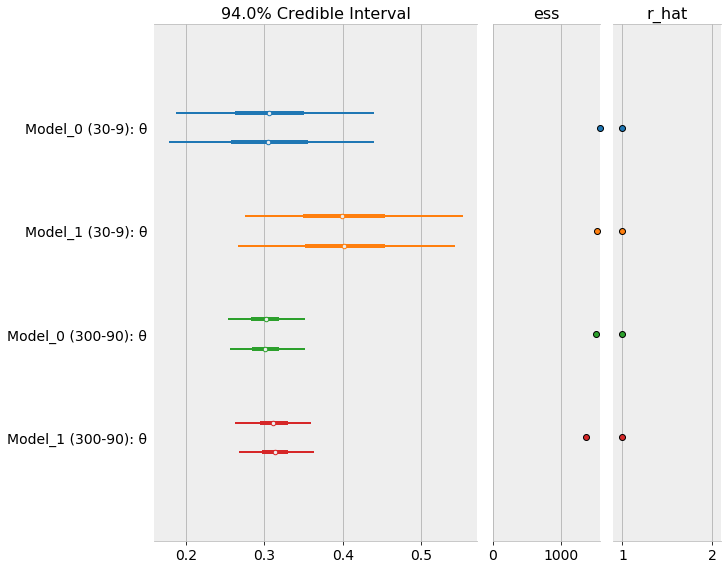

In [11]:
model_names = ['Model_0 (30-9)', 'Model_1 (30-9)',
               'Model_0 (300-90)', 'Model_1 (300-90)']

az.plot_forest(traces, model_names=model_names,r_hat=True,ess=True)
plt.savefig('B11197_05_12.png', dpi=300)

通过添加更多数据，我们几乎完全克服了先前的问题，现在两个模型都做出了相似的预测。 使用30个硬币和9个磁头作为我们的数据，我们看到的BF为11。如果我们对300个硬币和90个磁头的数据重复进行计算（您可以自由地自己做），我们将看到BF为25。 贝叶斯因子说，模型0比模型1更受青睐。 当我们增加数据时，模型之间的决策会变得更加清晰。 这是有道理的，因为现在我们可以确定模型1的先验数据与数据不一致。

还要注意，随着我们增加数据量，两种模型都倾向于在$ \ theta $的值上达成共识； 实际上，两种模型的取值为0.3。 因此，如果我们决定使用$ \theta $来预测新结果，则与我们计算$ \theta $的分布的模型几乎没有任何区别

现在，让我们比较一下WAIC告诉我们的内容（见图5.13）。 模型0的WAIC为368.4，模型1的WAIC为368.6。 比实际差异更重要的是，如果您再次计算数据的信息标准，即30个硬币和9个磁头，那么使用WAIC的模型0将获得类似38.1的信息，模型1将获得类似于39.4的信息。 也就是说，增加数据时的相对差异变得更小-$ \ theta的估计越相似，信息标准所估计的预测准确性的值就越相似。 如果使用LOO代替WAIC，您将观察到基本相同的结果：

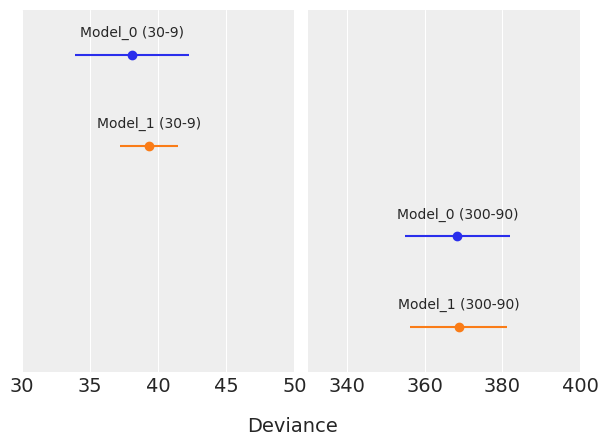

In [22]:
fig, ax = plt.subplots(1, 2, sharey=True)

labels = model_names
indices = [0, 0, 1, 1]
for i, (ind, d) in enumerate(zip(indices, waics)):
    mean = d.waic
    ax[ind].errorbar(mean, -i, xerr=d.waic_se, fmt='o')
    ax[ind].text(mean, -i+0.2, labels[i], ha='center')

ax[0].set_xlim(30, 50)
ax[1].set_xlim(330, 400)
plt.ylim([-i-0.5, 0.5])
plt.yticks([])
plt.subplots_adjust(wspace=0.05)
fig.text(0.5, 0, 'Deviance', ha='center', fontsize=14)
plt.savefig('B11197_05_13.png', dpi=300)

贝叶斯因素着重于哪种模型更好，而WAIC（和LOO）则着重于哪种模型能给出更好的预测。 如果返回并检查公式5.6和5.11，可以看到这些差异。 像其他信息标准一样，WAIC以一种或另一种方式使用对数似然性，并且先验不是直接属于计算的一部分。 先验只能通过帮助我们估计的价值间接参与。 相反，贝叶斯因子直接使用先验，因为我们需要在整个先验值范围内对可能性进行平均。

## Regularizing priors 规范先验
使用信息性先验信息和信息性弱的先验信息是在模型中引入偏差的一种方式，如果正确执行，这可能是一个很好的选择，因为偏差可防止过度拟合，从而有助于模型做出能够很好地概括的预测。 在不影响模型充分建模用于拟合的数据的能力的情况下增加偏倚以减少泛化误差的想法被称为正则化。 这种正则化通常采取惩罚模型中参数较大值的形式。 这是一种减少模型能够表示的信息，从而减少模型捕获噪声而不是信号的机会的方法。

正则化思想是如此强大和有用，以至于它被发现了好几次，包括在贝叶斯框架之外。在某些领域，这种想法称为Tikhonov正则化。在非贝叶斯统计中，此正则化思想采用对最小二乘法的两次修改的形式，分别称为岭回归和套索回归。从贝叶斯的角度来看，脊回归可以解释为使用（线性模型的）β系数的正态分布，并具有很小的标准偏差，将系数推向零。从这个意义上讲，我们一直在对本书中的每个线性模型进行类似于岭回归的操作（本章中使用SciPy！的示例除外）。另一方面，Lasso回归可以从贝叶斯的角度解释为后验的MAP，该后验的MAP是根据具有针对β系数的拉普拉斯先验的模型计算得出的。拉普拉斯分布看起来与高斯分布相似，但其一阶导数在零时未定义，因为它在零时具有非常尖锐的峰值（请参见图5.14）。与正态分布相比，拉普拉斯分布将其概率质量集中在非常接近零的位置。使用这种先验的想法是要提供正则化和变量选择。这样的想法是，由于我们的峰值为零，因此我们希望先验会导致稀疏，也就是说，我们创建了一个具有很多参数的模型，先验会自动将其中的大部分设为零，而仅使相关变量对模型的输出。不幸的是，贝叶斯套索并没有真正像这样工作，主要是因为为了拥有许多参数，拉普拉斯先验迫使非零参数变小。幸运的是，并不是所有的东西都丢失了—有一些贝叶斯模型可以用来诱发稀疏性和执行变量选择，例如马蹄铁和芬兰马蹄铁。

重要的是要注意，岭和拉索回归的经典版本对应于单点估计，而贝叶斯版本给出了完整的后验分布：

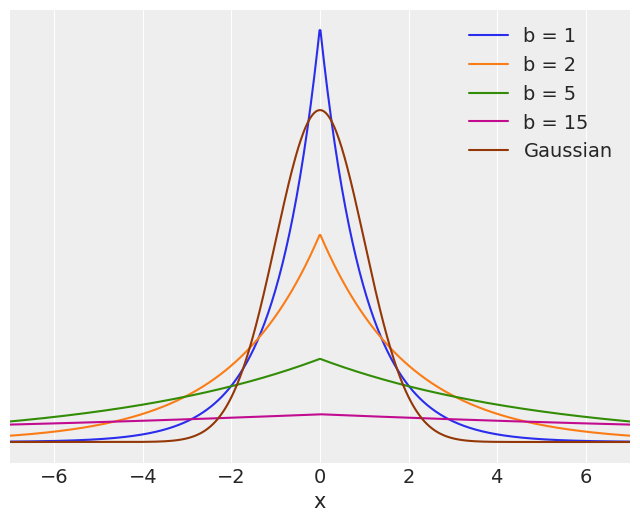

In [23]:
plt.figure(figsize=(8, 6))
x_values = np.linspace(-10, 10, 1000)
for df in [1, 2, 5, 15]:
    distri = stats.laplace(scale=df)
    x_pdf = distri.pdf(x_values)
    plt.plot(x_values, x_pdf, label=f'b = {df}')

x_pdf = stats.norm.pdf(x_values)
plt.plot(x_values, x_pdf, label='Gaussian')
plt.xlabel('x')
plt.yticks([])
plt.legend()
plt.xlim(-7, 7)
plt.savefig('B11197_05_14.png', dpi=300)

# WAIC in depth

![title](5_15.png)

此表达式中的两个术语看起来非常相似。第一个是lppd（对数逐点预测密度），它计算后验样本的平均似然。我们对每个数据点都执行此操作，然后取对数并汇总所有数据点。请将此术语与公式5.3和5.4进行比较。这就是我们所说的偏差，但考虑到后验是经过计算的。因此，如果我们认为计算对数似然性是衡量模型拟合是否适当的好方法，那么从后验计算对数是贝叶斯方法的逻辑路径。正如我们已经说过的，观测数据y的lddp是对未来数据的lppd的高估。因此，我们引入了第二项来纠正高估。第二项计算后验样本对数似然的方差。我们针对每个数据点执行此操作，然后对所有数据点进行汇总。为什么方差给出一个惩罚项？好吧，直觉类似于贝叶斯因子内置的Occam的Razor。有效参数的数量越大，后部的散布就越大。当我们向模型添加结构时，例如具有先验/规范化先验或分层依赖关系，与类似的未规范化或结构化程度较低的模型相比，我们将约束后验，从而减少了有效参数数量。

# Entropy

![title](5_16.png)

如我们所见，上图中的分布r是三个分布中分布更大的一个，也是最大熵的一个。我建议您使用代码并探索熵的变化（有关更多信息，请参见练习10）。

在前面的示例之后，您可能会倾向于将熵声明为一种测量分布方差的怪异形式。虽然这两个概念相关，但它们并不相同。在某些情况下，熵的增加意味着方差的增加。高斯分布就是这种情况。但是，我们也可以使用方差增加而熵不增加的示例。我们可以很严格地理解为什么会发生这种情况。假设我们有一个混合了两个高斯分布的分布（我们将在第6章，混合物模型中详细讨论混合物分布）。随着我们增加模态之间的距离，我们也会增加大量点距均值的距离，而方差恰好是所有点至均值的平均距离。因此，如果我们继续增加距离，方差将无限增加。熵将受到的影响较小，因为随着我们增加模之间的距离，模之间的点的概率越来越小，因此它们对总熵的贡献可以忽略不计。从熵的角度来看，如果我们从两个重叠的高斯开始，然后相对于另一个移动一个，那么在某个时候，我们将有两个分开的高斯。

熵也与信息的概念或不确定性有关。 实际上，通过这本书，我们一直在说，较分散或统一的先验分布信息量较小。 这不仅在直观上是正确的，而且对熵的概念也有理论上的支持。 实际上，在贝叶斯主义者中有一个部落使用熵来证明他们的信息量不足或规范化先验的正当性。 这通常被称为最大熵原理。 我们希望找到具有最大可能熵（最少信息量）的分布，但我们也想考虑到我们的问题所定义的约束。 这是一个可以通过数学方法解决的优化问题，但我们将不关注这些计算的细节。 我将提供一些示例。 在以下约束下，具有最大熵的分布是：

无限制：均匀分布（连续或离散，取决于变量的类型）
正平均值：指数
给定方差：正态分布
只有两个无序的结果和恒定的均值：二项式，如果我们有罕见事件，则为Poisson（请记住，泊松是二项式的特例）

有趣的是，许多广义线性模型（如我们在第4章“广义线性模型”中看到的模型）在给定模型约束的情况下通常使用最大熵分布进行定义。

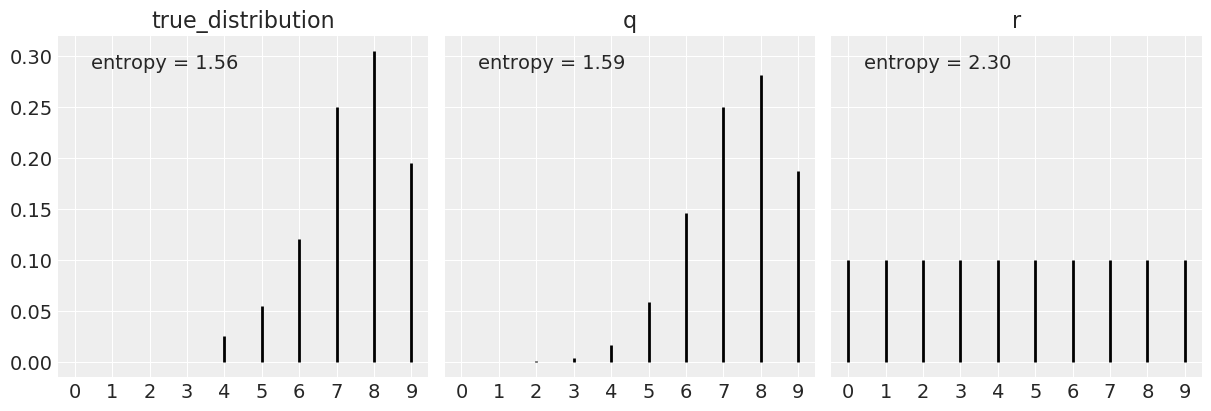

In [100]:
np.random.seed(912)
x = range(0, 10)
q = stats.binom(10, 0.75)
r = stats.randint(0, 10)

true_distribution = [list(q.rvs(200)).count(i) / 200 for i in x]

q_pmf = q.pmf(x)
r_pmf = r.pmf(x)

_, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True,
                     constrained_layout=True)

for idx, (dist, label) in enumerate(zip([true_distribution, q_pmf, r_pmf], ['true_distribution', 'q', 'r'])):
    ax[idx].vlines(x, 0, dist, label=f'entropy = {stats.entropy(dist):.2f}')
    ax[idx].set_title(label)
    ax[idx].set_xticks(x)
    ax[idx].legend(loc=2, handlelength=0)

plt.savefig('B11197_05_15.png', dpi=300)

# Kullback-Leibler divergence 散度
现在，我想简单地谈谈Kullback-Leibler（KL）的分歧，或者只是KL的分歧。 在阅读有关统计学，机器学习，信息论或统计力学的知识时，可能会发现这个概念。 您可能会争辩说，KL分歧以及诸如熵或边际可能性之类的其他概念再次出现的原因仅仅是，至少部分地，所有这些学科都在讨论着相同的问题集，只是观点略有不同。 。

KL散度很有用，因为它是一种测量两个分布的接近程度的方法，其定义如下：

![title](5_17.png)

这看成是从q到p的Kullback-Leibler散度（是的，您必须向后看），其中p和q是两个概率分布。 对于连续变量，而不是求和，应该计算一个整数，但是主要思想是相同的。

我们可以将$ D_{kl}（p || q）$的散度解释为通过使用概率分布q近似分布p引入的额外熵或不确定性。 实际上，KL散度是两个熵之间的差：

![title](5_18.png)

通过使用对数的属性，我们可以重新排列公式5.17以恢复公式5.16。 因此，我们还可以读取$ D_{kl}（p || q）$作为p相对于q的相对熵（这次，我们将其向前读）。

In [101]:
stats.entropy(true_distribution, q_pmf), stats.entropy(true_distribution, r_pmf)

(0.009657896086383405, 0.7394593875511319)

如果运行前面的代码块，则将得到0.0096和0.7394。 因此，我们可以得出结论，q比r是对true_distribution的更好近似，因为q是引入较少不确定性的那个。 我希望您就此数值结果与您通过检查图5.15所期望的结果相符的事实与我同意。

您可能会倾向于将KL-散度描述为距离，但它不是对称的，因此不是真实的距离。 如果运行以下代码块，则将得到2.7和0.7。 如您所见，这些数字并不相同。 在此示例中，我们可以看到r是q的更好近似值-这是相反的方法：

In [102]:
stats.entropy(r_pmf, q_pmf), stats.entropy(q_pmf, r_pmf)

(2.756929658156367, 0.7154903060638594)

$ D_{kl}（p || q）$表示q逼近p的程度，我们也可以从惊讶的角度来思考它，也就是说，如果我们在期望p时看到q，我们会感到多么惊讶。我们对某个事件的惊讶程度取决于我们用来判断该事件的信息。我在一个非常干旱的城市长大，一年大概有一两次真正的暴雨。然后。我搬到另一个省上大学，令我感到震惊的是，至少在雨季，平均每个星期有一次真正的暴雨！我的一些同学来自布宜诺斯艾利斯，布宜诺斯艾利斯是阿根廷最潮湿多雨的省份之一。对于他们来说，下雨的频率或多或少是预期的。更重要的是，他们认为由于空气不够潮湿，可能会下更多的雨。

我们可以使用KL散度来比较模型，因为这将对模型更接近真实分布的后验进行度量。问题在于我们不知道真实的分布。因此，KL散度不直接适用。但是，我们可以将其用作证明使用偏差的理由（表达式5.3）。如果我们假设存在一个真实分布，如以下等式所示，则该真实分布与任何模型和常数无关，因此，它将以相同的方式影响KL散度的值，而不考虑（后验） ）分布，我们可以用来近似真实分布。因此，我们可以使用偏差（即依赖于每个模型的部分）来估计我们与真实分布的接近程度，即使我们不知道它也是如此。从公式5.17并使用一些代数，我们可以看到以下内容：

![title](5_19.png)

即使我们不知道，我们也可以得出结论，如果需要，具有较大或似然性或偏差的分布是KL散度中的分布更接近真实分布。 实际上，对数似然/偏离是从已拟合有限样本的模型获得的。 因此，我们还必须添加一个惩罚项以纠正对偏差的过高估计，从而使我们达到WAIC和其他信息标准。

# 总结
后验预测检查是一个通用的概念和实践，可以帮助我们了解模型如何很好地捕获数据以及模型如何捕获我们感兴趣的问题的各个方面。我们可以仅使用一个模型或使用一个模型来进行后验预测检查。许多模型，因此我们可以将其用作模型比较的方法。后验预测检查通常是通过可视化完成的，但是像贝叶斯值之类的数字汇总也可能会有所帮助。

好的模型在复杂性和预测准确性之间具有良好的平衡。我们使用多项式回归的经典示例来举例说明此功能。我们讨论了在不保留数据的情况下估计样本外准确性的两种方法：交叉验证和信息标准。我们将讨论集中在后者上。从实践的角度来看，信息标准是平衡两种影响的方法系列：一种衡量模型拟合数据的程度，另一种则惩罚复杂的模型。从许多可用的信息标准中，WAIC对于贝叶斯模型最有用。 PSIS-LOO-CV（或LOO）是另一种有用的方法，在实践中可以提供与WAIC非常相似的结果。这是一种用于近似留一法交叉验证的方法，而无需实际多次拟合模型的高计算成本。 WAIC和LOO可以用于模型选择，也有助于模型平均。模型平均不是选择一个最佳模型，而是通过对所有可用模型进行加权平均来合并它们。

贝叶斯因子是模型选择，比较和模型平均的另一种方法，贝叶斯因子是两个模型的边际似然比。贝叶斯因子计算可能确实具有挑战性。在本章中，我们展示了两种使用PyMC3进行计算的途径：一个层次模型，在其中我们直接尝试使用离散索引来估计每个模型的相对概率；以及一种称为顺序蒙特卡洛的采样方法。我们建议使用后者。

考虑到贝叶斯因子对先前的规范非常敏感，除了在计算上存在挑战之外，贝叶斯因子的使用存在问题，我们还比较了贝叶斯因子和信息准则，并带您通过一个示例解决了两个相关但不同的问题。侧重于确定正确的模型，另一侧着眼于最佳预测或较低的泛化损失。这些方法都不是没有问题的，但是WAIC和LOO在实践中要强大得多。

我们简要讨论了关于具有良好泛化特性的建筑模型这一重要主题，先验与过拟合，偏差和正则化的主题之间的关系。

最后，我们通过对WAIC的更深入讨论来结束本书，其中包括对熵的相关概念，最大熵原理和KL散度的评论。

# 练习
This exercise is about regularization priors. In the code that generates
the data, change order=2 to another value, such as order=5 . Then, fit model_p
and plot the resulting curve. Repeat this, but now using a prior for beta
with sd=100 instead of sd=1 and plot the resulting curve. How are both
curves different? Try this out with sd=np. array([10, 0. 1, 0. 1, 0. 1, 0. 1] ) ,
too.

In [20]:
x_1p.shape
x_1s.shape
x_1p.mean(axis=1).shape

(5,)

Text(0, 0.5, 'y')

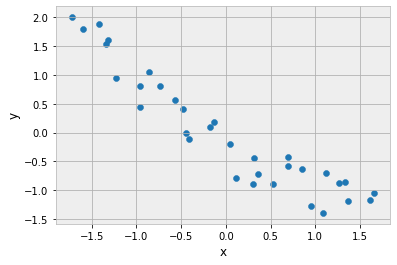

In [13]:
dummy_data = np.loadtxt('../data/dummy.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]

order_1 = 5
x_1p = np.vstack([x_1**i for i in range(1, order_1+1)]) 
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / \   ## 按行相加，并且保持其二维特性从（5,33）-> (5,1) 而不是（5，）
    x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

In [14]:
trace_1 = []
for sd in [1, 100, np.array([10, 0.1, 0.1, 0.1, 0.1])]:
    with pm.Model() as model_p:
        α = pm.Normal('α', mu=0, sd=1)
        β = pm.Normal('β', mu=0, sd=sd, shape=order_1)
        ϵ = pm.HalfNormal('ϵ', 5)

        μ = α + pm.math.dot(β, x_1s)

        y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_1s)

        trace_p = pm.sample(2000,cores=1,tune=1000,target_accept=0.9)
        trace_1.append([sd, trace_p])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, β, α]
Sampling chain 1, 0 divergences: 100%|█████████████████████████████████████████████| 3000/3000 [00:49<00:00, 60.69it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, β, α]
Sampling chain 1, 0 divergences: 100%|█████████████████████████████████████████████| 3000/3000 [03:30<00:00, 14.22it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, β, α]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 3000/3000 [00:08<00:00, 338.18it/s]


In [ ]:
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)

plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')

In [138]:
x_1s 

array([[-1.72414181, -1.5947931 , -1.41718994, -1.32135125, -1.33810627,
        -1.23087417, -0.96480453, -0.95877273, -0.85556184, -0.73492573,
        -0.56871598, -0.41591024, -0.4795793 , -0.44137787, -0.17932943,
        -0.12839419,  0.04786857,  0.11890983,  0.31862961,  0.3072362 ,
         0.36085225,  0.5310832 ,  0.69863335,  0.69662275,  0.85344969,
         0.95263938,  1.12354053,  1.0907007 ,  1.26897406,  1.33800472,
         1.37151475,  1.61412737,  1.66104141],
       [-0.6811725 , -0.76003053, -0.84312138, -0.87585202, -0.87074204,
        -0.89896365, -0.92310164, -0.9228906 , -0.91407052, -0.89128571,
        -0.83786718, -0.76623575, -0.7987041 , -0.77967256, -0.61277348,
        -0.57296772, -0.41671773, -0.34562583, -0.12078093, -0.13459894,
        -0.06852717,  0.15885519,  0.40880321,  0.40565007,  0.66281204,
         0.83719337,  1.15897266,  1.09504594,  1.45405472,  1.6009563 ,
         1.67385522,  2.23259249,  2.34691077]])

In [15]:
β_p_post = trace_1[0][1]['β'].mean(axis=0)
β_p_post

array([-1.4074686 ,  0.298151  ,  0.23741615,  0.13365443, -0.14892757],
      dtype=float32)

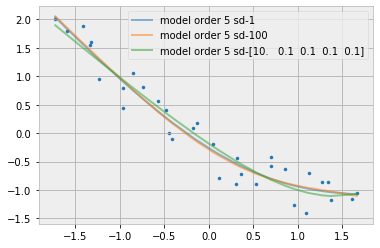

In [16]:
x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)

for i, (sd, trace) in enumerate(trace_1[:3]):

    α_p_post = trace['α'].mean()
    β_p_post = trace['β'].mean(axis=0)
    idx = np.argsort(x_1s[0])
    
    y_p_post = α_p_post + np.dot(β_p_post, x_1s) 
    plt.plot(x_1s[0][idx], y_p_post[idx], f'C{i}', label=f'model order {order_1} sd-{sd}', alpha=.5)

plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

In [17]:
trace_1[0][1]

<MultiTrace: 2 chains, 2000 iterations, 4 variables>

In [18]:
az.compare({'model_5_1':trace_1[0][1], 'model_5_100':trace_1[1][1], 'model_5_[10,0.1...]':trace_1[2][1]},
                    method='BB-pseudo-BMA')

C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\stats\stats.py:532: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_5_1,0,-5.92295,3.77038,0,0.45308,2.32459,0,False,log
"model_5_[10,0.1...]",1,-5.93951,2.74924,0.0165644,0.463111,2.27917,1.19353,False,log
model_5_100,2,-7.82018,5.08651,1.89723,0.0838095,2.53854,0.597343,True,log


In [23]:
#summaries = pd.concat([az.summary(trace_cm, var_names=['a','β','ϵ']),
az.summary(trace_1[0][1])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,-0.001,0.050,-0.094,0.096,0.001,0.001,2984.0,1239.0,3009.0,2105.0,1.0
β[0],-1.407,0.147,-1.695,-1.144,0.003,0.002,2940.0,2940.0,2956.0,2449.0,1.0
β[1],0.298,0.427,-0.525,1.066,0.009,0.007,2392.0,1918.0,2389.0,2322.0,1.0
β[2],0.237,0.722,-1.144,1.521,0.015,0.012,2390.0,1714.0,2405.0,2346.0,1.0
β[3],0.134,0.821,-1.438,1.637,0.018,0.014,2193.0,1669.0,2195.0,2188.0,1.0
β[4],-0.149,0.555,-1.178,0.905,0.012,0.009,2230.0,1830.0,2246.0,2342.0,1.0
ϵ,0.278,0.039,0.213,0.355,0.001,0.001,2294.0,2259.0,2365.0,2513.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF33037EB8>,
      dtype=object)

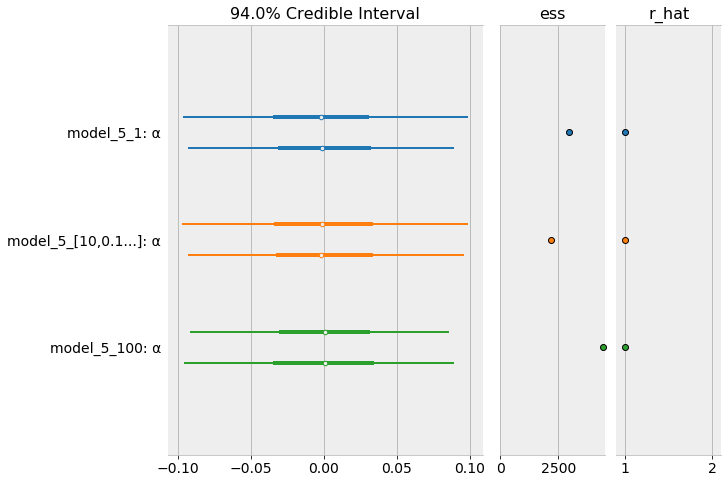

In [25]:
az.plot_forest([trace_1[0][1], trace_1[1][1],trace_1[2][1]], model_names=['model_5_1', 'model_5_[10,0.1...]','model_5_100'],
               var_names=['α'], r_hat=True,ess=True)

综合评价，最后一个模型已经过拟合了，尽管部分参数表现良好

In [118]:
#Exercise 3
dummy_data = np.loadtxt('../data/dummy.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]
y_1s = (y_1 - y_1.mean()) / y_1.std()

traces_3 = []
for order_3 in [1, 2, 3]:
    x_1p = np.vstack([x_1**i for i in range(1, order_3+1)])
    x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / \
        x_1p.std(axis=1, keepdims=True)
    
    with pm.Model() as model_p:
        α = pm.Normal('α', mu=0, sd=1)
        β = pm.Normal('β', mu=0, sd=1, shape=order_3)
        ϵ = pm.HalfNormal('ϵ', 5)

        μ = α + pm.math.dot(β, x_1s)
        y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_1s)

        trace_3 = pm.sample(2000,cores=1)
        traces_3.append([order_3, x_1s, trace_3])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, β, α]
Sampling chain 1, 0 divergences: 100%|███████████████████████████████████████████| 2500/2500 [00:02<00:00, 1093.19it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, β, α]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:05<00:00, 498.35it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, β, α]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:12<00:00, 204.33it/s]


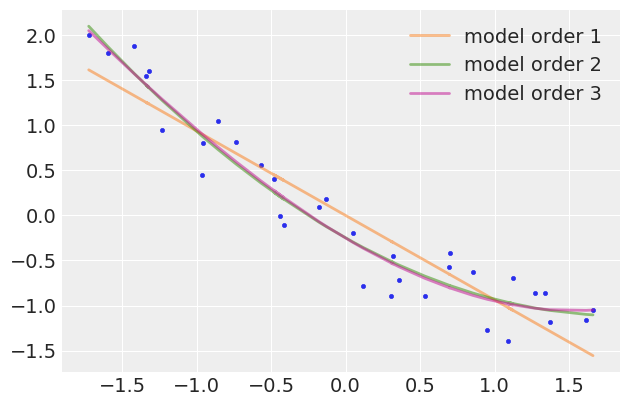

In [144]:
for i, (order_3, x_1s, trace) in enumerate(traces_3[:3]):

    α_p_post = trace['α'].mean()
    β_p_post = trace['β'].mean(axis=0)
    idx = np.argsort(x_1s[0])
    
    y_p_post = α_p_post + np.dot(β_p_post, x_1s) 
    plt.plot(x_1s[0], y_p_post, f'C{order_3}', label=f'model order {order_3}', alpha=.5)

plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

In [146]:
traces_d = {f"Model order {order}":trace for order, x_1s, trace in traces_3}
az.compare(traces_d)

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
Model order 2,0,9.0693,2.59405,0,0.669327,4.72121,0,False,deviance
Model order 3,1,10.5355,3.18014,1.46622,0.329524,5.44612,0.901293,False,deviance
Model order 1,2,28.783,2.47137,19.7137,0.0011488,4.70746,5.11379,False,deviance


Use pm. sample_posterior_predictive() to rerun the PPC example, but this
time, plot the values of y instead of the values of the mean.

In [147]:
posterior_predictive_draws = 2
y_l = pm.sample_posterior_predictive(trace_l, posterior_predictive_draws,
                                     model=model_l)['y_pred']

y_p = pm.sample_posterior_predictive(trace_p, posterior_predictive_draws,
                                     model=model_p)['y_pred']

C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 25.71it/s]


Text(0.5, 1.0, 'Linear Posterior Predictive Fit')

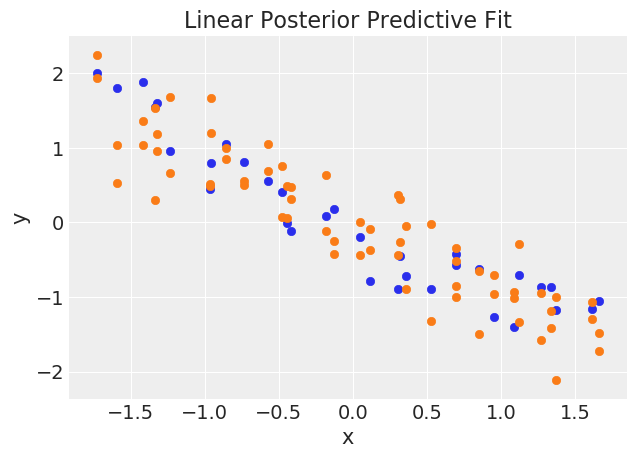

In [148]:

# Plot Linear Posterior Predictive fit
plt.scatter(x_1s[0], y_1s)
plt.scatter(np.tile(x_1s[0], posterior_predictive_draws), y_l)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Posterior Predictive Fit')

Text(0.5, 1.0, 'Quadratic Posterior Predictive Fit')

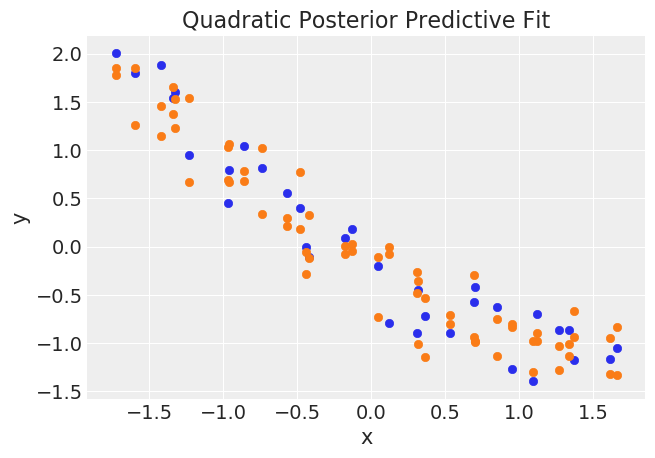

In [149]:

# Plot Quadratic Posterior Predictive fit
plt.scatter(x_1s[0], y_1s)
plt.scatter(np.tile(x_1s[0], posterior_predictive_draws), y_p)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Posterior Predictive Fit')

Read and run the posterior predictive example from PyMC3's
documentation at https: //pymc-devs. github. io/pymc3/notebooks/posterior_predic
tive. html . Pay special attention to the use of the Theano shared
variables.

后验预测检查（PPC）是验证模型的好方法。 想法是使用后验绘图中的参数从模型生成数据。

稍微详细地说，可以说PPC分析了从模型生成的数据与从真实分布生成的数据的偏离程度。 因此，通常您会想知道，例如，后验分布是否近似于基础分布。 这种模型评估方法的可视化方面也非常适合“检查”或向他人解释您的模型并受到批评。

在这里，我们将实现一个通用例程，以从模型的观察节点中抽取样本。

In [150]:
data = np.random.randn(100)

with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1, testval=0)
    sd = pm.HalfNormal('sd', sigma=1)
    n = pm.Normal('n', mu=mu, sigma=sd, observed=data)

    trace = pm.sample(5000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, mu]
Sampling chain 1, 0 divergences: 100%|███████████████████████████████████████████| 5500/5500 [00:04<00:00, 1132.39it/s]


C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

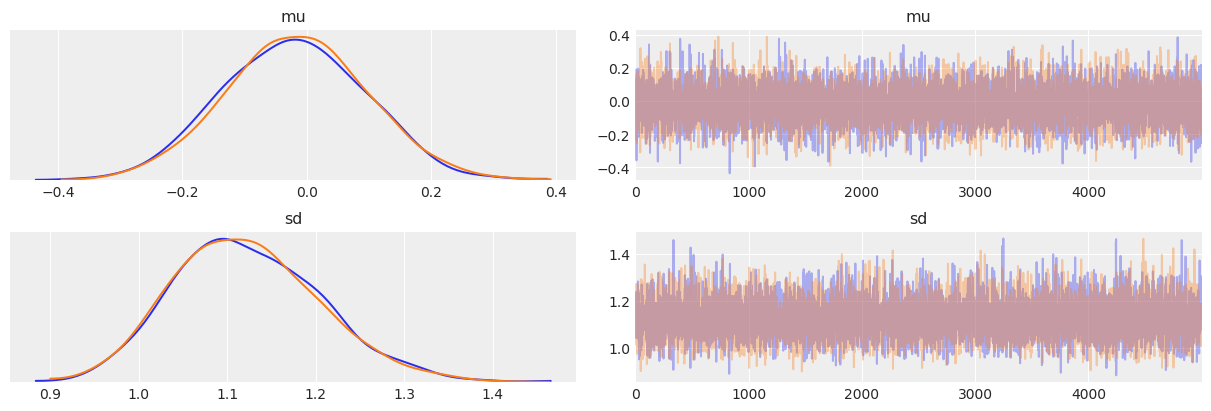

In [151]:
pm.traceplot(trace);

此函数将从跟踪中随机抽取500个参数样本。 然后，对于每个样本，它将从该样本中的mu和std值指定的正态分布中提取100个随机数。

In [152]:
ppc = pm.sample_posterior_predictive(trace, samples=500, model=model)

C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 559.53it/s]


In [153]:
np.asarray(ppc['n']).shape

(500, 100)

One common way to visualize is to look if the model can reproduce the patterns observed in the real data. For example, how close are the inferred means to the actual sample mean:

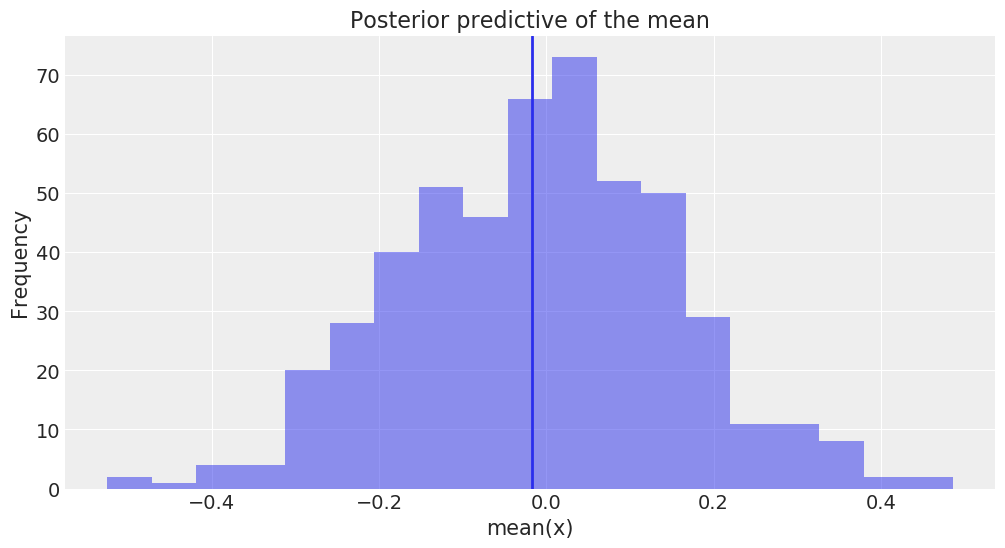

In [154]:
_, ax = plt.subplots(figsize=(12, 6))
ax.hist([n.mean() for n in ppc['n']], bins=19, alpha=0.5)
ax.axvline(data.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

PPC与其他模型评估方法之间的比较。¶
Edward文档中对此进行了出色的介绍：

PPC是修改模型，简化或扩展当前模型的出色工具，因为它可以检查模型对数据的拟合程度。他们的灵感来自先验和经典假设检验，其基本理念是应该在大样本评估的常识性观点下批评模型。

PPC还可以应用于假设检验，模型比较，模型选择和模型平均等任务。重要的是要注意，尽管它们可以用作贝叶斯假设检验的一种形式，但通常不建议使用假设检验：一次测试的二元决策并不像人们认为的那样常见。我们建议执行许多PPC，以全面了解模型拟合。

预测¶
可以将相同的模式用于预测。在这里，我们正在建立逻辑回归模型。请注意，由于我们要处理全部后验，因此免费预测中也存在不确定性。

In [21]:
# Use a theano shared variable to be able to exchange the data the model runs on
from theano import shared

def invlogit(x):
    return np.exp(x) / (1 + np.exp(x))

n = 4000
coeff = 1.

predictors = np.random.normal(size=n)
# Turn predictor into a shared var so that we can change it later
predictors_shared = shared(predictors)

outcomes = np.random.binomial(1, invlogit(coeff * predictors))
outcomes

array([0, 0, 1, ..., 0, 0, 1])

In [22]:
predictors_out_of_sample = np.random.normal(size=50)
outcomes_out_of_sample = np.random.binomial(1, invlogit(coeff * predictors_out_of_sample))

In [47]:
invlogit(coeff * predictors_out_of_sample)

Elemwise{true_div,no_inplace}.0

In [23]:
with pm.Model() as model:
    coeff = pm.Normal('coeff', mu=0, sigma=1)
    outcome = pm.Bernoulli('outcome', logit_p=coeff*predictors_shared, observed=outcomes)
    trace = pm.sample(5000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [coeff]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 5500/5500 [00:18<00:00, 303.45it/s]


In [24]:
# Changing values here will also change values in the model
predictors_shared.set_value(predictors_out_of_sample)

In [25]:
# Simply running PPC will use the updated values and do prediction
ppc = pm.sample_posterior_predictive(trace, model=model, samples=100)

C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 32.79it/s]


平均预测值加上误差线以提供预测的不确定性¶

请注意，这些是由MCMC估计引起的不确定性，而不是来自基础模型的不确定性。 如果我们在sample_posterior_predictive中抽取了更多样本，则误差线会很快变小。

In [46]:
outcomes_out_of_sample

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0])

In [44]:
print ((ppc['outcome'] == 1)[:,0].sum())   #在0维上加和
(ppc['outcome'] == 1).sum(axis=0)

18


array([18, 16, 77, 40, 60, 11, 77, 62, 50, 36, 88, 61, 49, 83, 26, 35, 74,
       64, 70, 14, 76, 32, 20, 53, 24, 65, 86, 43, 58, 65, 83, 64, 95, 30,
       58, 61, 59, 66, 19, 63, 47, 72, 72, 65, 78, 42, 85, 65, 90, 26])

In [29]:
β.interval(0.95)

(array([0.11146545, 0.09529409, 0.68310916, 0.30657253, 0.50278249,
        0.05678861, 0.68310916, 0.52328777, 0.40269792, 0.26927006,
        0.80988357, 0.513014  , 0.39290704, 0.75085366, 0.17927237,
        0.2600534 , 0.65018327, 0.54396469, 0.60709127, 0.07952385,
        0.67207149, 0.23267828, 0.12798473, 0.43230586, 0.1619159 ,
        0.5543693 , 0.78592236, 0.33498944, 0.48244407, 0.5543693 ,
        0.75085366, 0.54396469, 0.89977209, 0.21466799, 0.48244407,
        0.513014  , 0.49259267, 0.56481914, 0.11968435, 0.53360444,
        0.373443  , 0.62852854, 0.62852854, 0.5543693 , 0.69421296,
        0.32547624, 0.77412647, 0.5543693 , 0.83443102, 0.17927237]),
 array([0.26063892, 0.23756028, 0.84666906, 0.49721751, 0.69342747,
        0.17792456, 0.84666906, 0.71216444, 0.59730208, 0.45603531,
        0.93577221, 0.70281707, 0.58747201, 0.89666668, 0.34981673,
        0.4456307 , 0.82072763, 0.73072994, 0.78533201, 0.21407764,
        0.8380841 , 0.41414161, 0.28336763, 0.

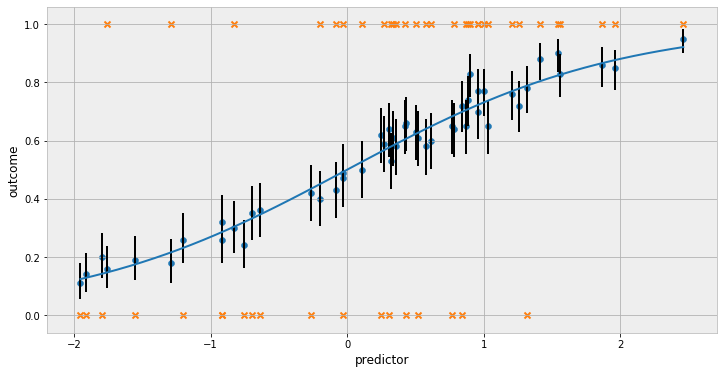

In [26]:
_, ax = plt.subplots(figsize=(12, 6))

β = stats.beta((ppc['outcome'] == 1).sum(axis=0), (ppc['outcome'] == 0).sum(axis=0))

# estimated probability
ax.scatter(x=predictors_out_of_sample, y=β.mean())

# error bars on the estimate
plt.vlines(predictors_out_of_sample, *β.interval(0.95))   #打开（）

# actual outcomes
ax.scatter(x=predictors_out_of_sample,
           y=outcomes_out_of_sample, marker='x')

# True probabilities
x = np.linspace(predictors_out_of_sample.min(), predictors_out_of_sample.max())
ax.plot(x, invlogit(x), linestyle='-')


ax.set_xlabel('predictor')
ax.set_ylabel('outcome');

Go back to the code that generated Figure 5.5 and Figure 5.6, and
modify it to get new sets of six data points. Visually evaluate how the
different polynomials fit these new datasets. Relate the results to the
discussions in this book.

Text(0, 0.5, 'y')

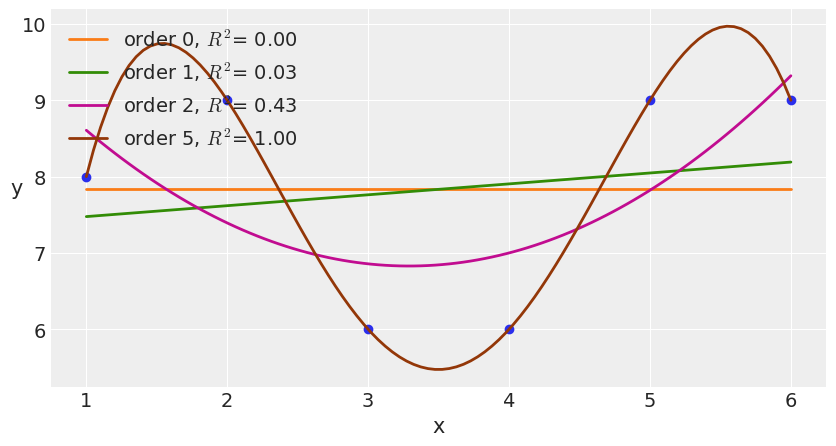

In [164]:
x = np.arange(1,7)
y = np.random.randint(0, 10, size = 6)

plt.figure(figsize=(10, 5))
order = [0, 1, 2, 5]
plt.plot(x, y, 'o')
for i in order:
    x_n = np.linspace(x.min(), x.max(), 100)
    coeffs = np.polyfit(x, y, deg=i)
    ffit = np.polyval(coeffs, x_n)

    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.mean(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    r2 = ssreg / sstot

    plt.plot(x_n, ffit, label=f'order {i}, $R^2$= {r2:.2f}')

plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y', rotation=0)

不出所料，当我们有一个低阶多项式时，我们的模型无法很好地拟合数据。对于零阶多项式，无论如何，我们都只能预测相同的值。 对于高阶多项式，拟合看起来很好，但这仅适用于我们已经看到的数据。 通常，当引入新的数据点时，模型将无法很好地完成工作。 此外，如果数据中有噪声，则模型将认为噪声是有意义的，而实际上这是错误的，没有任何意义。

Read and run the model averaging example from PyMC3's
documentation at https: //docs. pymc. io/notebooks/model_averaging. html .

下面的示例摘自Richard McElreath的出色著作《 Statistical Rethinking》。您可以在此存储库中从本书中找到更多的PyMC3示例。我们将探索它的简化版本。在本书中查看整个示例，并对这两个示例进行更彻底的讨论，包括对这个问题的生物学动机，以及使用信息标准比较，选择和平均模型的理论/实践讨论。

简而言之，我们的问题如下：我们想探索几种灵长类动物的牛奶成分，假设来自大脑较大的灵长类动物的雌性会生产更多的营养牛奶（松散地说，这样做是为了支持人类的发展）。这么大的大脑）。对于进化生物学家来说，这是一个重要的问题，我们将使用3个变量（两个预测变量）来给出答案：新皮层与大脑总质量的比例以及母亲体重的对数。对于预测变量，是每克牛奶的千卡。使用这些变量，我们将构建3个不同的线性模型：

仅使用neocortex变量的模型

仅使用质量变量的对数的模型

同时使用两个变量的模型

In [5]:
import pandas as pd
d = pd.read_csv('../data/milk.csv')
d.loc[:,'neocortex'] = d['neocortex.perc'] / 100
d.loc[:,'logmass'] = np.log(d['mass'])
d.iloc[:,2:] = d.iloc[:,2:] - d.iloc[:,2:].mean()
d.head()

,clade,species,kcal.per.g,perc.fat,perc.protein,perc.lactose,mass,neocortex.perc,neocortex,logmass
0,Strepsirrhine,Eulemur fulvus,-0.151724,-17.390345,-0.983448,18.373793,-12.776897,-12.415882,-0.124159,-0.774005
1,Strepsirrhine,E macaco,-0.131724,-14.720345,0.506552,14.213793,-12.636897,NaN,NaN,-0.704671
2,Strepsirrhine,E mongoz,-0.181724,-19.880345,0.446552,19.433793,-12.216897,NaN,NaN,-0.521552
3,Strepsirrhine,E rubriventer,-0.161724,-19.080345,-3.223448,22.303793,-13.106897,NaN,NaN,-0.959408
4,Strepsirrhine,Lemur catta,-0.041724,-6.710345,3.096552,3.613793,-12.536897,NaN,NaN,-0.657933


In [6]:
neocortex = d['neocortex'].values.copy()
# PyMC3 can handle missing value quite naturally.  处理缺失值
mask = np.isfinite(neocortex)
neocortex[~mask] = -999
neocortex = np.ma.masked_values(neocortex, value=-999)
with pm.Model() as model_0:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', 10)
    nu = pm.Normal('nu', .5, 1.)
    sigma_N = pm.HalfCauchy('sigma_N', 1.)
    neocortex_ = pm.Normal('neocortex', nu, sigma_N, observed=neocortex)
    mu = alpha + beta * neocortex_

    kcal = pm.Normal('kcal', mu=mu, sigma=sigma, observed=d['kcal.per.g'])
    trace_0 = pm.sample(2000,cores=1)

C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\model.py:1430: ImputationWarning: Data in neocortex contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [neocortex_missing, sigma_N, nu, sigma, beta, alpha]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:07<00:00, 330.76it/s]


In [7]:
with pm.Model() as model_1:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=1)
    sigma = pm.HalfNormal('sigma', 10)

    mu = alpha + beta * d['logmass']

    kcal = pm.Normal('kcal', mu=mu, sigma=sigma, observed=d['kcal.per.g'])

    trace_1 = pm.sample(2000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:03<00:00, 653.44it/s]
The acceptance probability does not match the target. It is 0.879322908122459, but should be close to 0.8. Try to increase the number of tuning steps.


In [8]:
with pm.Model() as model_2:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=1)
    beta2 = pm.Normal('beta2', mu=0, sigma=1)
    sigma = pm.HalfNormal('sigma', 10)
    
    nu = pm.Normal('nu', .5, 1.)
    sigma_N = pm.HalfCauchy('sigma_N', 1.)
    neocortex_ = pm.Normal('neocortex', nu, sigma_N, observed=neocortex)

    mu = alpha + beta1 * neocortex_ + beta2 * d['logmass']

    kcal = pm.Normal('kcal', mu=mu, sigma=sigma, observed=d['kcal.per.g'])

    trace_2 = pm.sample(2000,cores=1)

C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\model.py:1430: ImputationWarning: Data in neocortex contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [neocortex_missing, sigma_N, nu, sigma, beta2, beta1, alpha]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:07<00:00, 314.47it/s]


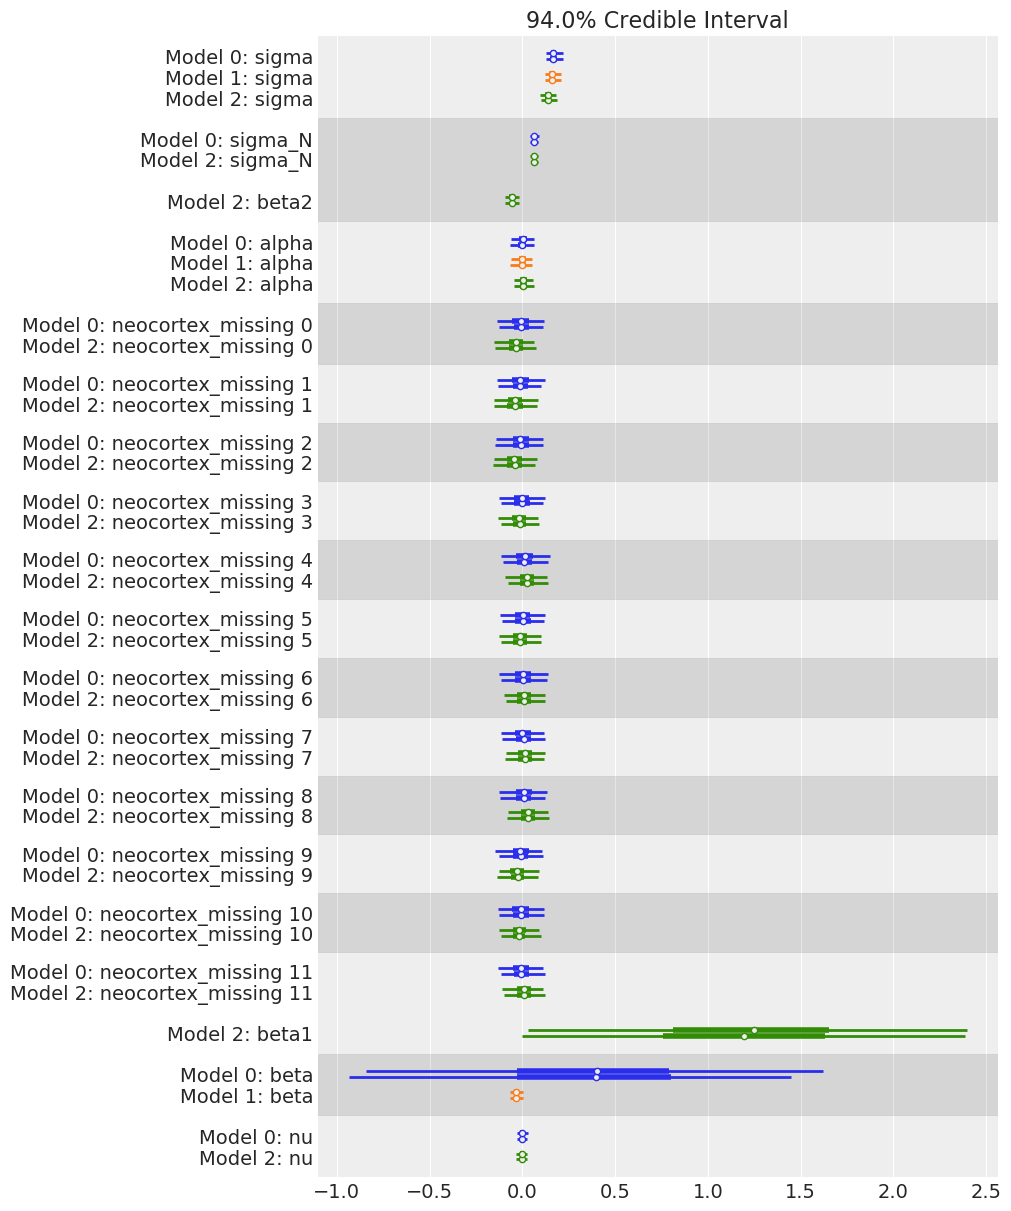

In [206]:
traces = [trace_0, trace_1, trace_2]
pm.forestplot(traces, figsize=(10, 12));

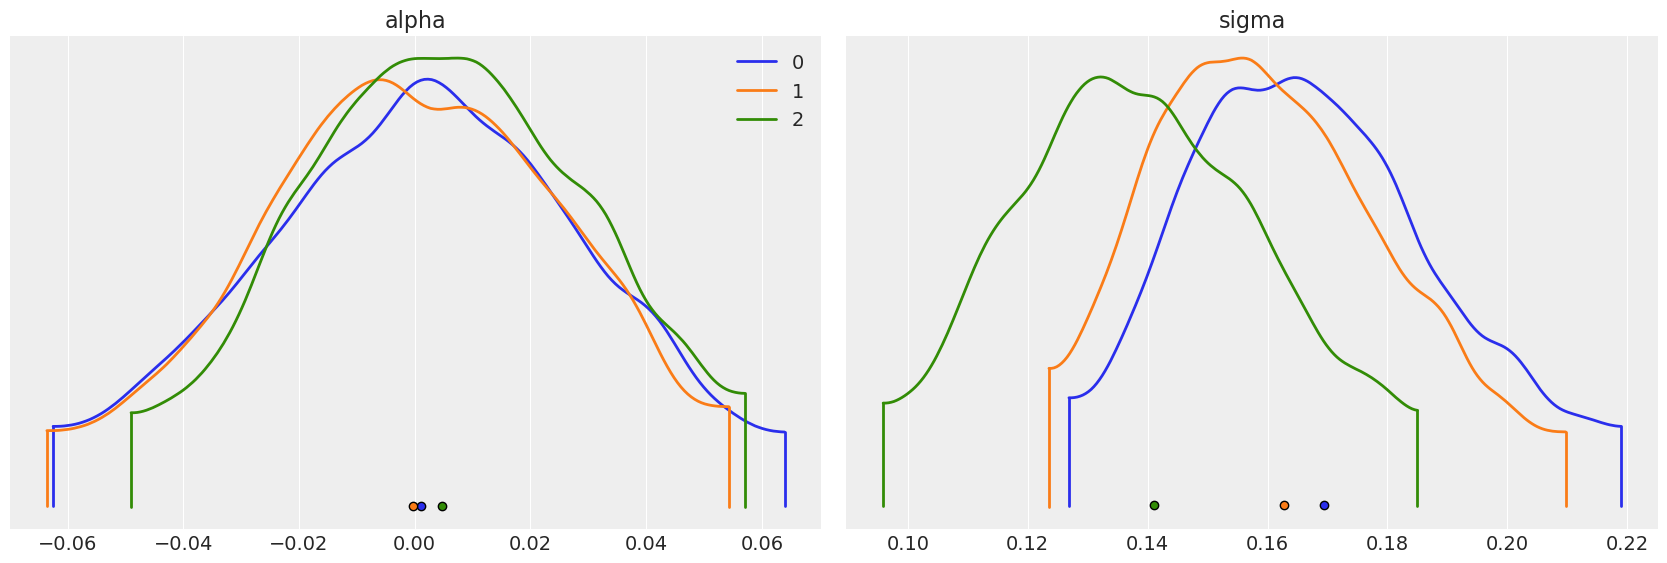

In [203]:
pm.densityplot(traces, var_names=['alpha', 'sigma']);

In [9]:
 az.loo(trace_1)

Computed from 4000 by 29 log-likelihood matrix

       Estimate       SE
IC_loo   -22.22     5.66
p_loo      2.14        -

In [10]:
trace_0[0]['neocortex_missing']

array([-0.0814024 ,  0.01980358, -0.08493449,  0.08396973,  0.08265554,
        0.03684896,  0.11807495,  0.09979282, -0.05410022,  0.16473424,
        0.00724288, -0.08643188])

In [18]:
idata_general = az.from_pymc3(trace_0)
idata_general.log_likelihood

AttributeError: 'InferenceData' object has no attribute 'log_likelihood'

In [19]:

az.loo(idata_general)

TypeError: Data must include log_likelihood in sample_stats

In [223]:
idata_pymc3 = az.from_pymc3(trace_2)
idata_pymc3.sample_stats

<xarray.Dataset>
Dimensions:           (chain: 2, draw: 2000)
Coordinates:
  * chain             (chain) int32 0 1
  * draw              (draw) int32 0 1 2 3 4 5 ... 1994 1995 1996 1997 1998 1999
Data variables:
    lp                (chain, draw) float64 45.33 38.45 39.82 ... 37.73 39.81
    energy_error      (chain, draw) float64 -0.1642 0.6817 ... -0.6948 -0.08741
    depth             (chain, draw) int64 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3
    diverging         (chain, draw) bool False False False ... False False False
    max_energy_error  (chain, draw) float64 -0.5006 1.122 ... -0.7352 -0.5559
    energy            (chain, draw) float64 -39.26 -28.76 ... -23.16 -28.03
    step_size         (chain, draw) float64 0.4498 0.4498 ... 0.3388 0.3388
    mean_tree_accept  (chain, draw) float64 1.0 0.4963 0.9307 ... 0.9079 0.9812
    step_size_bar     (chain, draw) float64 0.4922 0.4922 ... 0.4929 0.4929
    tune              (chain, draw) bool False False False ... False False False
    tree_size         (chain, draw) float64 7.0 7.0 7.0 7.0 ... 7.0 7.0 7.0 7.0
Attributes:
    created_at:                 2020-05-02T16:07:42.357603
    inference_library:          pymc3
    inference_library_version:  3.8

我们可以看到，最好的模型是model_2，它具有两个预测变量。请注意，DataFrame的WAIC顺序从最低到最高（即从更好到最坏）。查看此笔记本，以获取有关模型比较的更详细讨论。

我们还可以看到，我们得到了一个列，其中包含每个模型的相对权重（根据此笔记本开头的第一个方程式）。权重可以模糊地解释为每种模型对未来数据做出正确预测的概率。当然，这种解释取决于用于计算权重的模型，如果我们添加或删除模型，则权重将发生变化。并且还取决于WAIC（或使用的任何其他信息标准）背后的假设。因此，请不要过度解释这些权重。

现在，我们将使用计算权重来生成预测，而不是基于单个模型，而是基于加权模型集。这是执行模型平均的一种方法。使用PyMC3，我们可以按以下方式调用sample_posterior_predictive_w函数：

In [62]:
models=[model_0, model_1, model_2]
traces=[trace_0,trace_1,trace_2]
mt=dict(zip(models,traces))
mt

{<pymc3.model.Model at 0x2048f46f518>: <MultiTrace: 2 chains, 2000 iterations, 8 variables>,
 <pymc3.model.Model at 0x2048f314978>: <MultiTrace: 2 chains, 2000 iterations, 4 variables>,
 <pymc3.model.Model at 0x204a3aa7518>: <MultiTrace: 2 chains, 2000 iterations, 9 variables>}

In [63]:
az.compare(mt)

TypeError: Found several log likelihood arrays ['neocortex', 'kcal'], var_name cannot be None

In [61]:

ppc_w = pm.sample_posterior_predictive_w(traces, 1000, [model_0, model_1, model_2],weights=comp.weight.sort_index(ascending=True),progressbar=False)

NameError: name 'comp' is not defined

请注意，我们正在传递按其索引排序的权重。 之所以这样做，是因为我们将跟踪和模型从模型0传递到模型2，但是计算的权重是从最低WAIC到最高WAIC（或从大权重到最低权重）排序的。 总之，我们必须确保正确地将权重和模型配对。

我们还将为最低的WAIC模型计算PPC

In [225]:
ppc_2 = pm.sample_posterior_predictive(trace_2, 1000, model_2,
                     progressbar=False)

C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


In [ ]:
A simple way to compare both kind of predictions is to plot their mean and hpd interval

In [ ]:
mean_w = ppc_w['kcal'].mean()
hpd_w = pm.hpd(ppc_w['kcal']).mean(0)

mean = ppc_2['kcal'].mean()
hpd = pm.hpd(ppc_2['kcal']).mean(0)

plt.errorbar(mean, 1, xerr=[[mean - hpd]], fmt='o', label='model 2')
plt.errorbar(mean_w, 0, xerr=[[mean_w - hpd_w]], fmt='o', label='weighted models')

plt.yticks([])
plt.ylim(-1, 2)
plt.xlabel('kcal per g')
plt.legend();

As we can see the mean value is almost the same for both predictions but the uncertainty in the weighted model is larger. We have effectively propagated the uncertainty about which model we should select to the posterior predictive samples. You can now try with the other two methods for computing weights stacking (the default and recommended method) and pseudo-BMA.

最后说明：

平均模型还有其他方法，例如，显式构建包含我们拥有的所有模型的元模型。然后，我们在模型之间跳转时执行参数推断。这种方法的一个问题是，在模型之间跳转可能会妨碍对后验的正确采样。

除了平均离散模型外，有时我们还可以想到它们的连续版本。一个玩具的例子是，假设我们有一枚硬币，并且想要估计它的偏斜程度，0到1之间的数字等于0.5的正面和反面机会相等。我们可以想到两个分离的模型，一个模型的先验偏向头部，另一个偏向尾部。我们可以拟合两个单独的模型，然后使用例如IC得出的权重对它们进行平均。另一种选择是建立一个层次模型来估计先验分布，而不是考虑两个离散模型，我们将计算一个连续模型，其中包括这些离散模型作为特殊情况。哪种方法更好？那取决于我们的具体问题。我们是否有充分的理由考虑两个离散模型，还是用一个更大的连续模型更好地表示我们的问题？

Compute the Bayes factor for the coin problem using a uniform prior
beta (1, 1) and priors such as beta (0.5, 0.5). Set 15 heads and 30
coins. Compare this result with the inference we got in the first chapter
of this book.

In [165]:
# Generate coin flips
coins = 30 
heads = 15
y_d = np.repeat([0, 1], [coins-heads, heads])

In [166]:
with pm.Model() as model_BF_0:
    θ = pm.Beta('θ', 1, 1)
    y = pm.Bernoulli('y', θ, observed=y_d)
    trace_BF_0 = pm.sample_smc(2500, cores=1)

with pm.Model() as model_BF_1:
    θ = pm.Beta('θ', .5, .5)
    y = pm.Bernoulli('y', θ, observed=y_d)
    trace_BF_1 = pm.sample_smc(2500, cores=1)

Sample initial stage: ...
Stage:   0 Beta: 0.360 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.703
Sample initial stage: ...
Stage:   0 Beta: 0.146 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.689


In [167]:
model_BF_0.marginal_likelihood / model_BF_1.marginal_likelihood

1.5465981574686978

回到图1.4，我们可以看到$ Beta（1,1）$是平坦的，这意味着所有值都是相同的，但是先前的$ Beta（.5，.5）$具有接近0和1的较大值。 从直觉上讲，我们的硬币正面或背面都有很大偏差。 查看数据时，无需推断，似乎我们的硬币是公平的。

贝叶斯因子反映了这一点，因为分子中的$ Beta（1,1）$模型产生的贝叶斯因子为1.4，表示“无经济性”偏好。 但是在这种情况下，我们确定贝叶斯因子对先验敏感，因为两个模型的似然函数相同。

Repeat the last example where we compare Bayes factors and
Information Criteria, but now reduce the sample size.

For the entropy example, change the q distribution. Try this with
distributions like stats. binom(10, 0. 5) and stats. binom(10, 0. 25) .

In [168]:
x = range(0, 10)
q = stats.binom(10, 0.5)
q_pmf = q.pmf(x)
stats.entropy(q_pmf)

1.8700347100756574

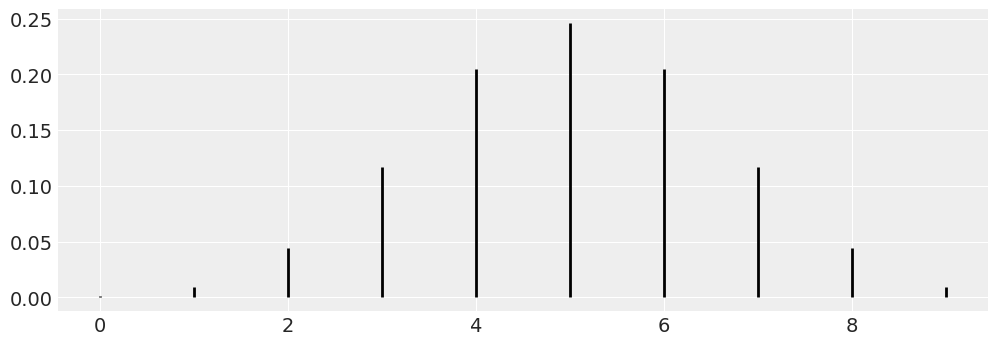

In [169]:
_, ax = plt.subplots(figsize=(12, 4))
ax.vlines(x, 0, q_pmf)

In [170]:
x = range(0, 10)
q = stats.binom(10, 0.25)
q_pmf = q.pmf(x)

stats.entropy(q_pmf)

1.7144085256537243

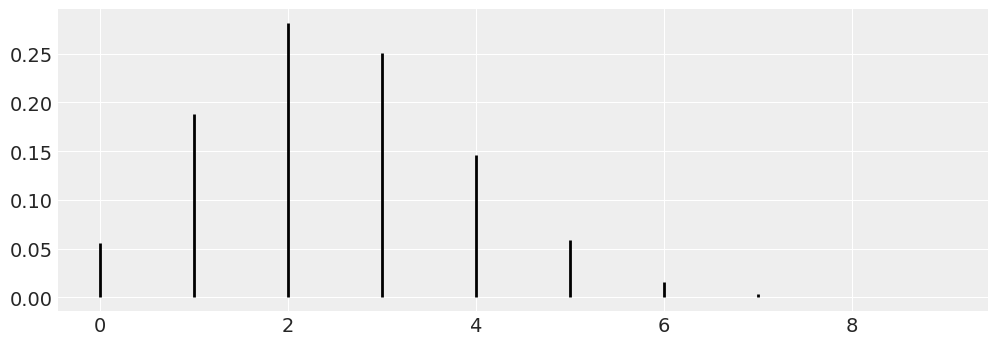

In [171]:
_, ax = plt.subplots(figsize=(12, 4))
ax.vlines(x, 0, q_pmf)

这个答案从直觉上讲是有道理的，因为在总分布上的0的下限在$ p =.25 $的二项式模型中较少“分散”

In [4]:
import sys, IPython, scipy, matplotlib
print("""This notebook was created using:\nPython {}\nIPython {}\nPyMC3 {}\nArviZ {}\nNumPy {}\nMatplotlib {}\n""".format(sys.version[:5], IPython.__version__, pm.__version__, az.__version__, np.__version__, matplotlib.__version__))

This notebook was created using:
Python 3.6.1
IPython 7.12.0
PyMC3 3.8
ArviZ 0.6.1
NumPy 1.18.1
Matplotlib 3.1.3

